	1.	获取数据：收集历史上的利率数据和股市指数数据。
	2.	数据清洗和处理：确保数据格式一致并处理缺失值。
	3.	分析方法：通过统计分析、可视化和回归分析等方法来观察利率变化与股市走势之间的关系。

以下是一个详细的Python代码示例，可以在Google Colab上运行来完成这个分析。

In [1]:
!pip install yfinance
!pip install pandas_datareader
!pip install matplotlib
!pip install seaborn

In [2]:
import yfinance as yf
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 获取股市数据（例如，标普500指数）
start_date = '1990-01-01'
end_date = '2023-12-31'
stock_data = yf.download('^GSPC', start=start_date, end=end_date)

# 获取美联储利率数据
fed_rates = pdr.get_data_fred('FEDFUNDS', start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
# 合并数据
data = stock_data[['Close']].merge(fed_rates, how='inner', left_index=True, right_index=True)
data.rename(columns={'Close': 'SP500_Close', 'FEDFUNDS': 'Fed_Rate'}, inplace=True)

# 计算股市收益率
data['SP500_Return'] = data['SP500_Close'].pct_change()

# 填补缺失值
data.dropna(inplace=True)

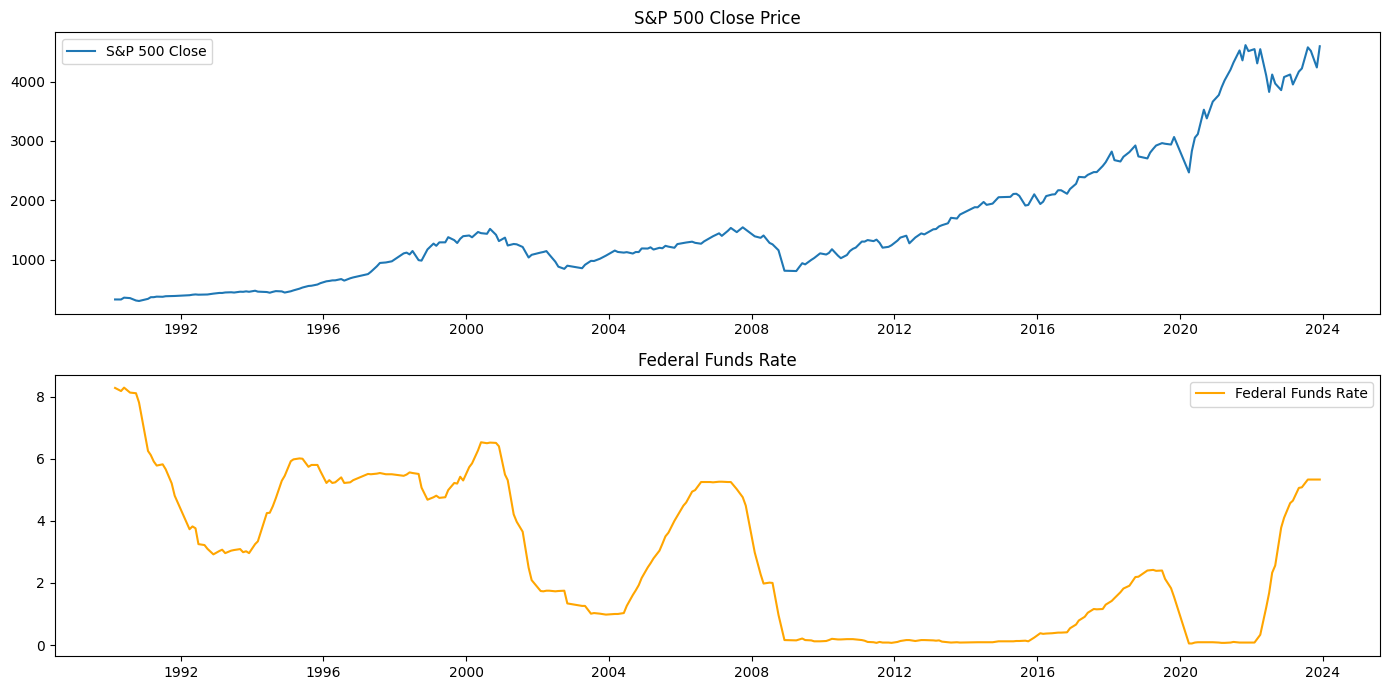

In [5]:
# 可视化利率与股市走势
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['SP500_Close'], label='S&P 500 Close')
plt.title('S&P 500 Close Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data.index, data['Fed_Rate'], label='Federal Funds Rate', color='orange')
plt.title('Federal Funds Rate')
plt.legend()

plt.tight_layout()
plt.show()

              SP500_Return  Fed_Rate
SP500_Return       1.00000   0.02444
Fed_Rate           0.02444   1.00000


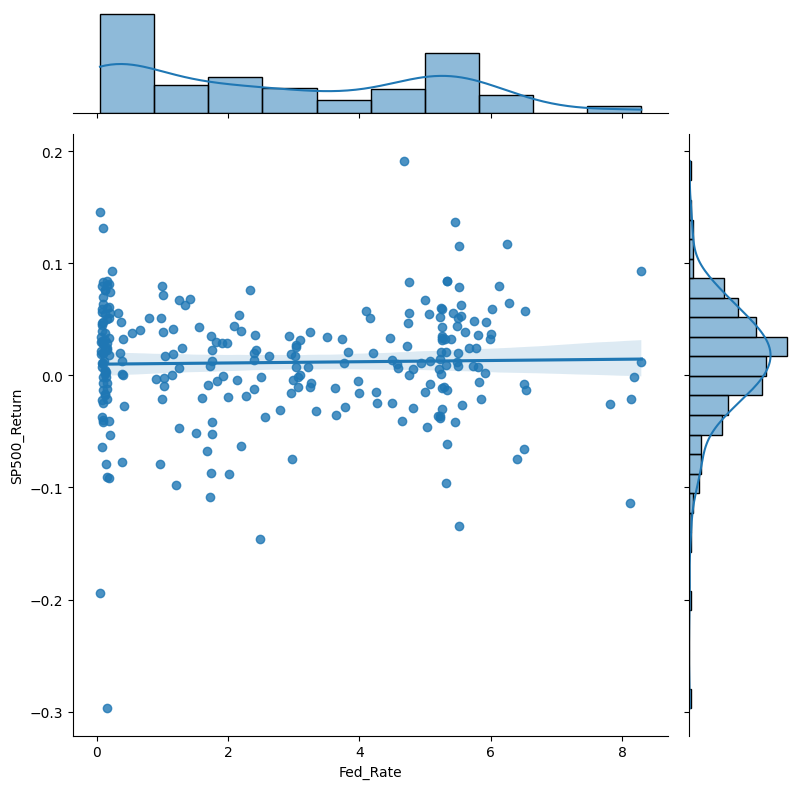

In [6]:
# 计算相关系数
correlation = data[['SP500_Return', 'Fed_Rate']].corr()
print(correlation)

# 可视化相关性
sns.jointplot(x='Fed_Rate', y='SP500_Return', data=data, kind='reg', height=8)
plt.show()

In [7]:
import statsmodels.api as sm

# 准备数据
X = data['Fed_Rate']
y = data['SP500_Return']
X = sm.add_constant(X)

# 线性回归模型
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           SP500_Return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1554
Date:                Sun, 21 Jul 2024   Prob (F-statistic):              0.694
Time:                        14:30:37   Log-Likelihood:                 398.64
No. Observations:                 262   AIC:                            -793.3
Df Residuals:                     260   BIC:                            -786.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.005      1.988      0.0

[*********************100%%**********************]  1 of 1 completed


历史上著名的降低利率事件及其后一年的股市表现：
          Date  1-Year Return (%)
0   1982-08-17          51.586566
1   1998-09-29          20.909989
2   2001-01-03         -13.527415
3   2001-04-18          -9.182178
4   2001-09-17         -15.908237
5   2007-09-18         -20.612853
6   2007-12-11         -40.879774
7   2008-10-08           8.177146
8   2008-10-29          14.624386
9   2008-12-16          21.463464
10  2020-03-03          27.181127

在这些事件中，股市在一年内上涨的次数: 6
在这些事件中，股市在一年内下跌的次数: 5


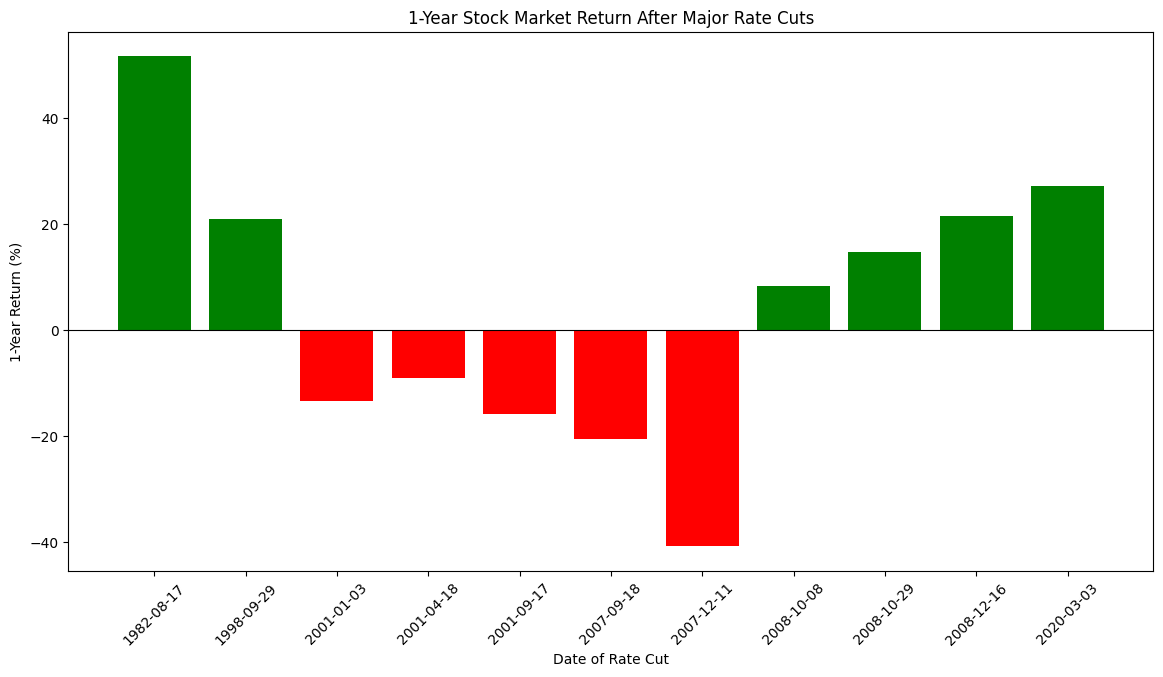

In [9]:
# 定义更多的降低利率时间点
rate_cut_dates = [
    '1982-08-17',
    '1990-07-13',
    '1998-09-29',
    '2001-01-03',
    '2001-04-18',
    '2001-09-17',
    '2007-09-18',
    '2007-12-11',
    '2008-10-08',
    '2008-10-29',
    '2008-12-16',
    '2020-03-03',
    '2020-03-15'
]

# 获取股市数据（标普500指数）
stock_data = yf.download('^GSPC', start='1980-01-01', end='2024-01-01')

# 分析每个时间点后的一年内股市表现
results = []
for date in rate_cut_dates:
    start_date = pd.to_datetime(date)
    end_date = start_date + pd.DateOffset(years=1)

    if start_date in stock_data.index and end_date in stock_data.index:
        before_price = stock_data.loc[start_date, 'Close']
        after_price = stock_data.loc[end_date, 'Close']

        if pd.notna(before_price) and pd.notna(after_price):
            return_percentage = (after_price - before_price) / before_price * 100
            results.append((date, return_percentage))

# 创建 DataFrame
results_df = pd.DataFrame(results, columns=['Date', '1-Year Return (%)'])

# 计算上涨和下跌次数
num_up = len(results_df[results_df['1-Year Return (%)'] > 0])
num_down = len(results_df[results_df['1-Year Return (%)'] < 0])

# 打印结果
print("历史上著名的降低利率事件及其后一年的股市表现：")
print(results_df)
print(f"\n在这些事件中，股市在一年内上涨的次数: {num_up}")
print(f"在这些事件中，股市在一年内下跌的次数: {num_down}")

# 可视化结果
plt.figure(figsize=(14, 7))
plt.bar(results_df['Date'], results_df['1-Year Return (%)'], color=['green' if x > 0 else 'red' for x in results_df['1-Year Return (%)']])
plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel('Date of Rate Cut')
plt.ylabel('1-Year Return (%)')
plt.title('1-Year Stock Market Return After Major Rate Cuts')
plt.xticks(rotation=45)
plt.show()

## 不同持有時期的平均收益


[*********************100%%**********************]  1 of 1 completed


最佳持有期为 28 个月，平均收益率为 25.50%


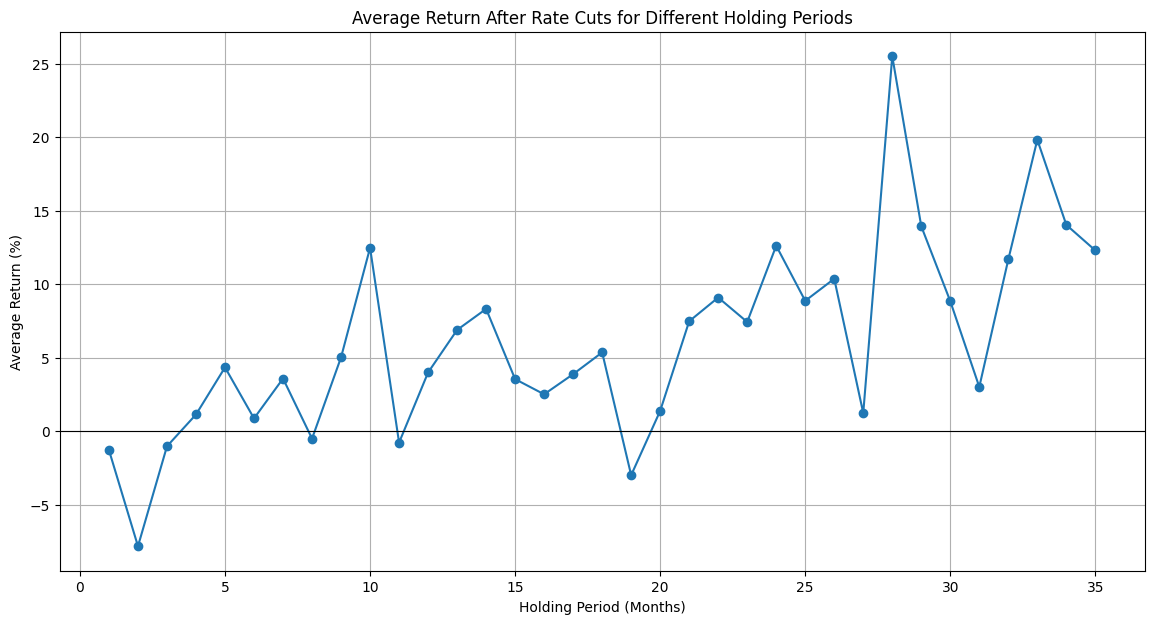

In [12]:
rate_cut_dates = [
    '1982-08-17',
    '1990-07-13',
    '1998-09-29',
    '2001-01-03',
    '2001-04-18',
    '2001-09-17',
    '2007-09-18',
    '2007-12-11',
    '2008-10-08',
    '2008-10-29',
    '2008-12-16',
    '2020-03-03',
    '2020-03-15'
]

# 获取股市数据（标普500指数）
stock_data = yf.download('^GSPC', start='1980-01-01', end='2024-01-01')

# 分析每个时间点后的股市表现
results = []
for date in rate_cut_dates:
    start_date = pd.to_datetime(date)

    # 计算不同持有期的收益率
    for months in range(1, 36):  # 从1个月到24个月
        end_date = start_date + pd.DateOffset(months=months)

        if start_date in stock_data.index and end_date in stock_data.index:
            before_price = stock_data.loc[start_date, 'Close']
            after_price = stock_data.loc[end_date, 'Close']

            if pd.notna(before_price) and pd.notna(after_price):
                return_percentage = (after_price - before_price) / before_price * 100
                results.append((date, months, return_percentage))

# 创建 DataFrame
results_df = pd.DataFrame(results, columns=['Date', 'Months', 'Return (%)'])

# 计算不同持有期的平均收益率
average_returns = results_df.groupby('Months')['Return (%)'].mean()

# 打印最佳持有期
best_holding_period = average_returns.idxmax()
best_return = average_returns.max()
print(f"最佳持有期为 {best_holding_period} 个月，平均收益率为 {best_return:.2f}%")

# 可视化结果
plt.figure(figsize=(14, 7))
plt.plot(average_returns.index, average_returns.values, marker='o')
plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel('Holding Period (Months)')
plt.ylabel('Average Return (%)')
plt.title('Average Return After Rate Cuts for Different Holding Periods')
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed


最佳入场时间为降低利率后 1 个月，12个月的平均收益率为 17.99%


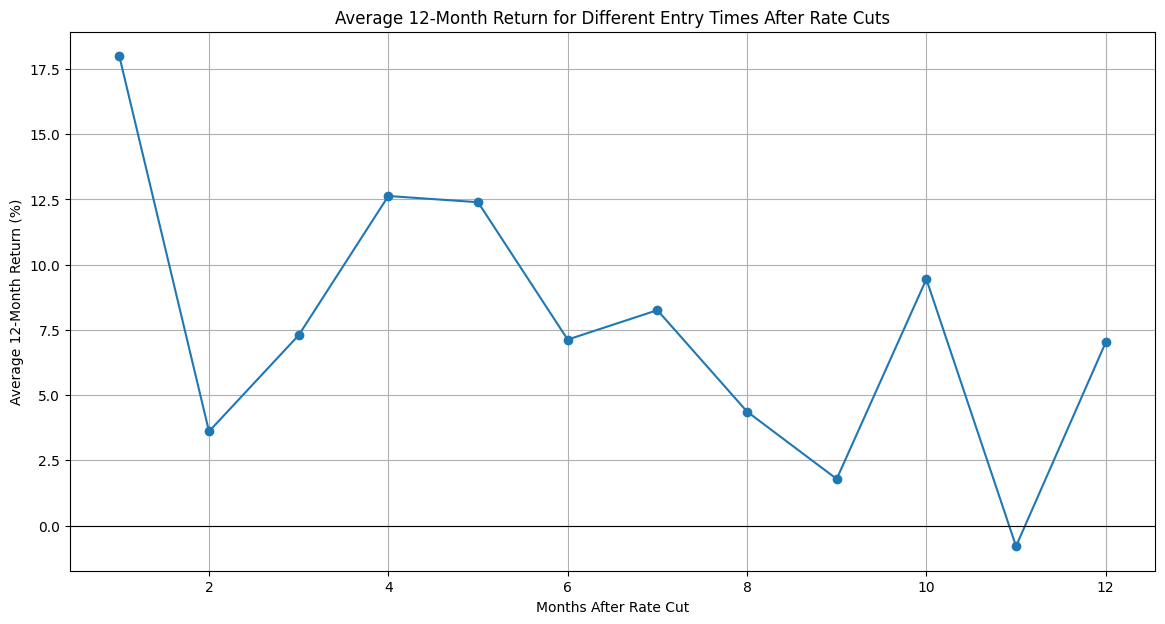

In [13]:
# 定义更多的降低利率时间点
rate_cut_dates = [
    '1982-08-17',
    '1990-07-13',
    '1998-09-29',
    '2001-01-03',
    '2001-04-18',
    '2001-09-17',
    '2007-09-18',
    '2007-12-11',
    '2008-10-08',
    '2008-10-29',
    '2008-12-16',
    '2020-03-03',
    '2020-03-15'
]

# 获取股市数据（标普500指数）
stock_data = yf.download('^GSPC', start='1980-01-01', end='2024-01-01')

# 分析每个时间点后的股市表现
results = []
for date in rate_cut_dates:
    start_date = pd.to_datetime(date)

    # 计算不同持有期的收益率
    for months_after_cut in range(1, 13):  # 从1个月到12个月之后入场
        entry_date = start_date + pd.DateOffset(months=months_after_cut)
        holding_period = 12  # 持有期固定为12个月
        exit_date = entry_date + pd.DateOffset(months=holding_period)

        if entry_date in stock_data.index and exit_date in stock_data.index:
            entry_price = stock_data.loc[entry_date, 'Close']
            exit_price = stock_data.loc[exit_date, 'Close']

            if pd.notna(entry_price) and pd.notna(exit_price):
                return_percentage = (exit_price - entry_price) / entry_price * 100
                results.append((date, months_after_cut, return_percentage))

# 创建 DataFrame
results_df = pd.DataFrame(results, columns=['Rate Cut Date', 'Months After Cut', '12-Month Return (%)'])

# 计算不同入场时间的平均收益率
average_returns = results_df.groupby('Months After Cut')['12-Month Return (%)'].mean()

# 打印最佳入场时间
best_entry_time = average_returns.idxmax()
best_return = average_returns.max()
print(f"最佳入场时间为降低利率后 {best_entry_time} 个月，12个月的平均收益率为 {best_return:.2f}%")

# 可视化结果
plt.figure(figsize=(14, 7))
plt.plot(average_returns.index, average_returns.values, marker='o')
plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel('Months After Rate Cut')
plt.ylabel('Average 12-Month Return (%)')
plt.title('Average 12-Month Return for Different Entry Times After Rate Cuts')
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


最佳入场时间为降低利率后 1 个月，12个月的平均收益率为 17.99%


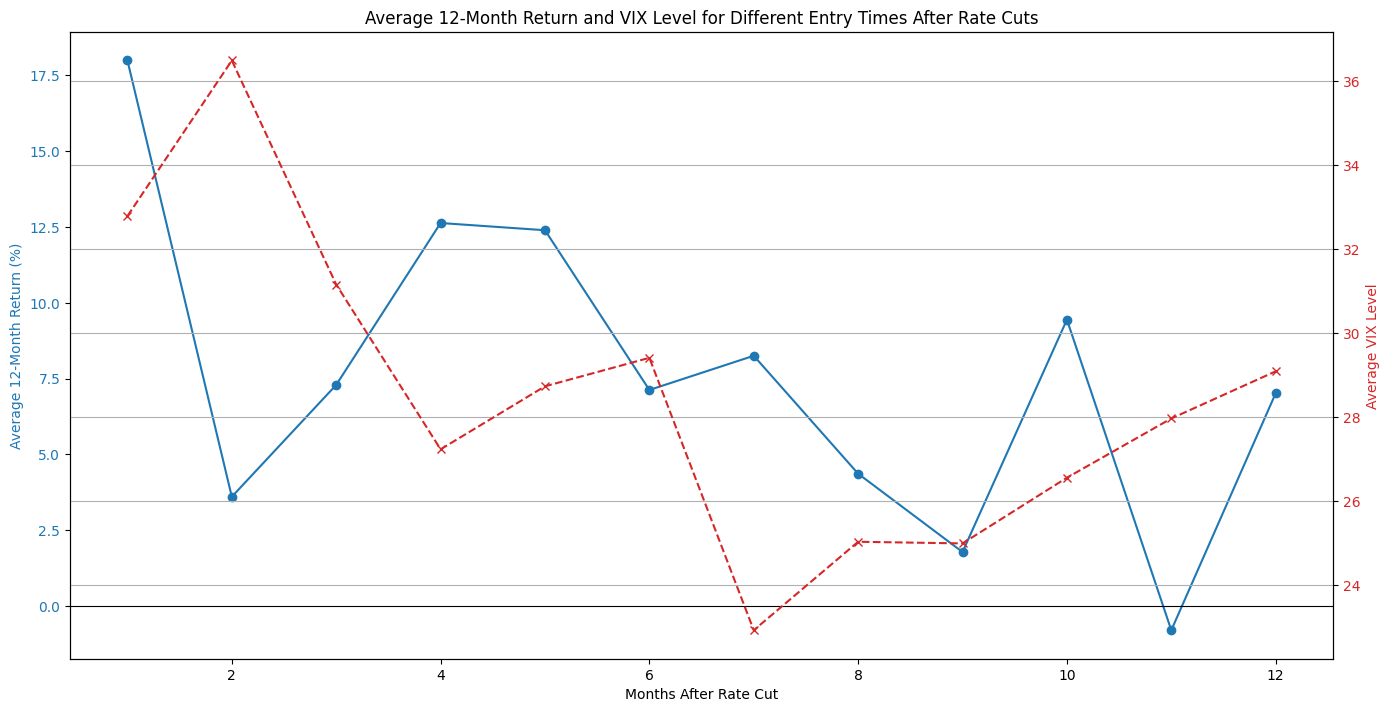

In [15]:
import numpy as np
# 定义更多的降低利率时间点
rate_cut_dates = [
    '1982-08-17',
    '1990-07-13',
    '1998-09-29',
    '2001-01-03',
    '2001-04-18',
    '2001-09-17',
    '2007-09-18',
    '2007-12-11',
    '2008-10-08',
    '2008-10-29',
    '2008-12-16',
    '2020-03-03',
    '2020-03-15'
]

# 获取股市数据（标普500指数）
stock_data = yf.download('^GSPC', start='1980-01-01', end='2024-01-01')

# 获取VIX数据（市场情绪）
vix_data = yf.download('^VIX', start='1980-01-01', end='2024-01-01')

# 分析每个时间点后的股市表现
results = []
for date in rate_cut_dates:
    start_date = pd.to_datetime(date)

    # 计算不同持有期的收益率
    for months_after_cut in range(1, 13):  # 从1个月到12个月之后入场
        entry_date = start_date + pd.DateOffset(months=months_after_cut)
        holding_period = 12  # 持有期固定为12个月
        exit_date = entry_date + pd.DateOffset(months=holding_period)

        if entry_date in stock_data.index and exit_date in stock_data.index:
            entry_price = stock_data.loc[entry_date, 'Close']
            exit_price = stock_data.loc[exit_date, 'Close']

            if pd.notna(entry_price) and pd.notna(exit_price):
                return_percentage = (exit_price - entry_price) / entry_price * 100
                vix_level = vix_data.loc[entry_date, 'Close'] if entry_date in vix_data.index else np.nan
                results.append((date, months_after_cut, return_percentage, vix_level))

# 创建 DataFrame
results_df = pd.DataFrame(results, columns=['Rate Cut Date', 'Months After Cut', '12-Month Return (%)', 'VIX Level'])

# 计算不同入场时间的平均收益率
average_returns = results_df.groupby('Months After Cut')['12-Month Return (%)'].mean()
average_vix = results_df.groupby('Months After Cut')['VIX Level'].mean()

# 打印最佳入场时间
best_entry_time = average_returns.idxmax()
best_return = average_returns.max()
print(f"最佳入场时间为降低利率后 {best_entry_time} 个月，12个月的平均收益率为 {best_return:.2f}%")

# 可视化结果
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Months After Rate Cut')
ax1.set_ylabel('Average 12-Month Return (%)', color=color)
ax1.plot(average_returns.index, average_returns.values, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axhline(0, color='black', linewidth=0.8)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average VIX Level', color=color)
ax2.plot(average_vix.index, average_vix.values, marker='x', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Average 12-Month Return and VIX Level for Different Entry Times After Rate Cuts')
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


各个产业在不同入场时间后的最佳收益情况：
Technology: 最佳入场时间为降低利率后 1 个月，12个月的平均收益率为 14.73%
Financials: 最佳入场时间为降低利率后 1 个月，12个月的平均收益率为 26.63%
Energy: 最佳入场时间为降低利率后 1 个月，12个月的平均收益率为 52.18%
Consumer Discretionary: 最佳入场时间为降低利率后 1 个月，12个月的平均收益率为 64.67%
Health Care: 最佳入场时间为降低利率后 1 个月，12个月的平均收益率为 20.65%
Industrials: 最佳入场时间为降低利率后 1 个月，12个月的平均收益率为 65.96%


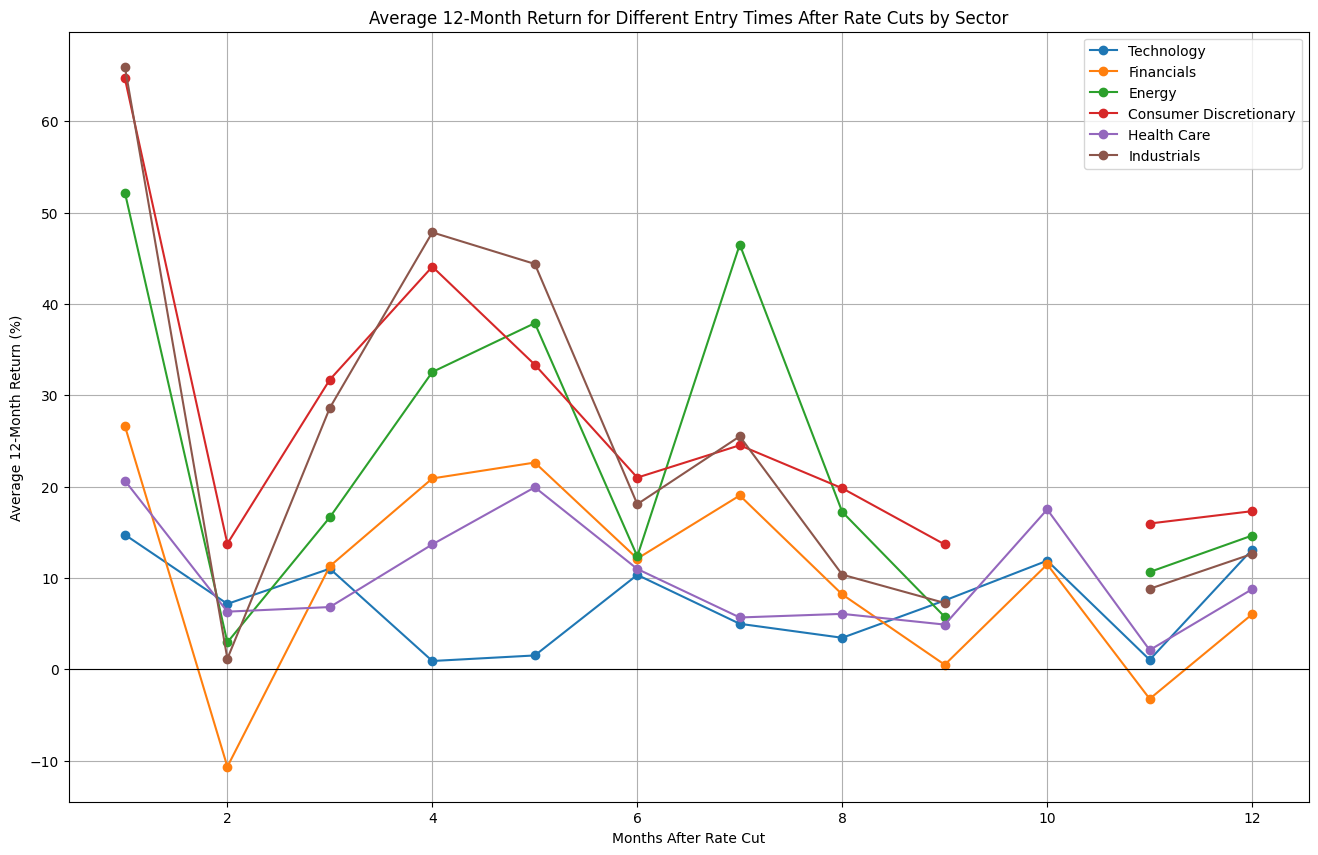

In [17]:
rate_cut_dates = [
    '1982-08-17',
    '1990-07-13',
    '1998-09-29',
    '2001-01-03',
    '2001-04-18',
    '2001-09-17',
    '2007-09-18',
    '2007-12-11',
    '2008-10-08',
    '2008-10-29',
    '2008-12-16',
    '2020-03-03',
    '2020-03-15'
]

# 定义各个产业的ETF
etfs = {
    'Technology': 'XLK',
    'Financials': 'XLF',
    'Energy': 'XLE',
    'Consumer Discretionary': 'XLY',
    'Health Care': 'XLV',
    'Industrials': 'XLI'
}

# 获取数据
data = {}
for sector, etf in etfs.items():
    data[sector] = yf.download(etf, start='1980-01-01', end='2024-01-01')

# 分析每个时间点后的产业表现
results = []
for date in rate_cut_dates:
    start_date = pd.to_datetime(date)

    for sector, df in data.items():
        for months_after_cut in range(1, 13):  # 从1个月到12个月之后入场
            entry_date = start_date + pd.DateOffset(months=months_after_cut)
            holding_period = 12  # 持有期固定为12个月
            exit_date = entry_date + pd.DateOffset(months=holding_period)

            if entry_date in df.index and exit_date in df.index:
                entry_price = df.loc[entry_date, 'Close']
                exit_price = df.loc[exit_date, 'Close']

                if pd.notna(entry_price) and pd.notna(exit_price):
                    return_percentage = (exit_price - entry_price) / entry_price * 100
                    results.append((date, sector, months_after_cut, return_percentage))

# 创建 DataFrame
results_df = pd.DataFrame(results, columns=['Rate Cut Date', 'Sector', 'Months After Cut', '12-Month Return (%)'])

# 计算不同入场时间的平均收益率
average_returns = results_df.groupby(['Sector', 'Months After Cut'])['12-Month Return (%)'].mean().unstack()

# 打印最佳入场时间
best_entry_times = average_returns.idxmax(axis=1)
best_returns = average_returns.max(axis=1)
print("各个产业在不同入场时间后的最佳收益情况：")
for sector in etfs.keys():
    print(f"{sector}: 最佳入场时间为降低利率后 {best_entry_times[sector]} 个月，12个月的平均收益率为 {best_returns[sector]:.2f}%")

# 可视化结果
plt.figure(figsize=(16, 10))
for sector in etfs.keys():
    plt.plot(average_returns.columns, average_returns.loc[sector], marker='o', label=sector)

plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel('Months After Rate Cut')
plt.ylabel('Average 12-Month Return (%)')
plt.title('Average 12-Month Return for Different Entry Times After Rate Cuts by Sector')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

各个产业在不同入场时间后的最佳收益情况：
Technology: 最佳入场时间为降低利率后 1 个月，12个月的平均收益率为 57.07%
Financials: 最佳入场时间为降低利率后 10 个月，12个月的平均收益率为 39.46%
Energy: 最佳入场时间为降低利率后 7 个月，12个月的平均收益率为 14.60%
Consumer Discretionary: 最佳入场时间为降低利率后 1 个月，12个月的平均收益率为 109.81%
Health Care: 最佳入场时间为降低利率后 5 个月，12个月的平均收益率为 39.24%
Industrials: 最佳入场时间为降低利率后 1 个月，12个月的平均收益率为 28.67%


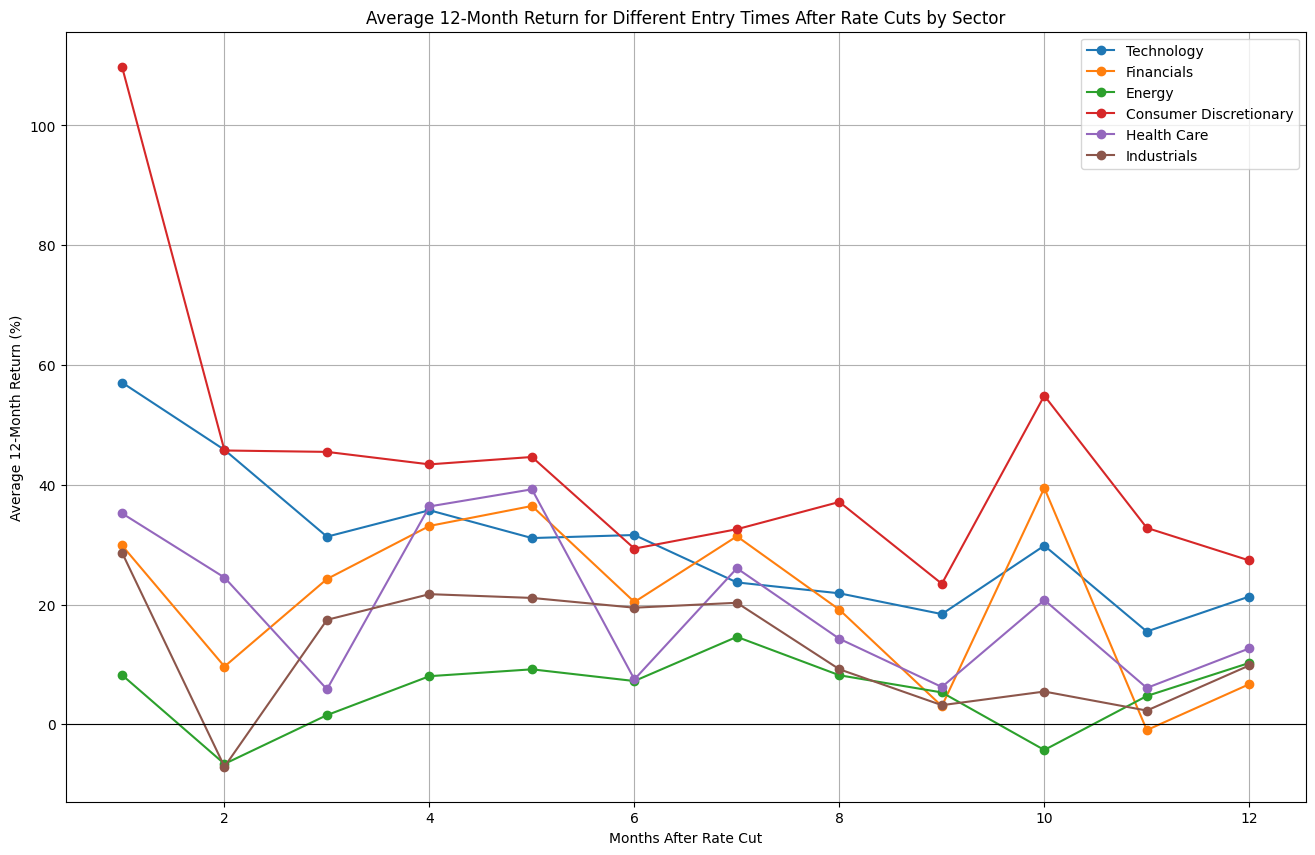

In [18]:
# 定义代表公司
companies = {
    'Technology': ['AAPL', 'MSFT', 'GOOGL'],
    'Financials': ['JPM', 'BAC', 'GS'],
    'Energy': ['XOM', 'CVX', 'COP'],
    'Consumer Discretionary': ['AMZN', 'TSLA', 'DIS'],
    'Health Care': ['JNJ', 'PFE', 'UNH'],
    'Industrials': ['GE', 'BA', 'CAT']
}

# 定义更多的降低利率时间点
rate_cut_dates = [
    '1982-08-17',
    '1990-07-13',
    '1998-09-29',
    '2001-01-03',
    '2001-04-18',
    '2001-09-17',
    '2007-09-18',
    '2007-12-11',
    '2008-10-08',
    '2008-10-29',
    '2008-12-16',
    '2020-03-03',
    '2020-03-15'
]

# 获取数据
data = {}
for sector, tickers in companies.items():
    for ticker in tickers:
        data[ticker] = yf.download(ticker, start='1980-01-01', end='2024-01-01')

# 分析每个时间点后的公司表现
results = []
for date in rate_cut_dates:
    start_date = pd.to_datetime(date)

    for sector, tickers in companies.items():
        for ticker in tickers:
            for months_after_cut in range(1, 13):  # 从1个月到12个月之后入场
                entry_date = start_date + pd.DateOffset(months=months_after_cut)
                holding_period = 12  # 持有期固定为12个月
                exit_date = entry_date + pd.DateOffset(months=holding_period)

                if entry_date in data[ticker].index and exit_date in data[ticker].index:
                    entry_price = data[ticker].loc[entry_date, 'Close']
                    exit_price = data[ticker].loc[exit_date, 'Close']

                    if pd.notna(entry_price) and pd.notna(exit_price):
                        return_percentage = (exit_price - entry_price) / entry_price * 100
                        results.append((date, sector, ticker, months_after_cut, return_percentage))

# 创建 DataFrame
results_df = pd.DataFrame(results, columns=['Rate Cut Date', 'Sector', 'Ticker', 'Months After Cut', '12-Month Return (%)'])

# 计算不同入场时间的平均收益率
average_returns = results_df.groupby(['Sector', 'Months After Cut'])['12-Month Return (%)'].mean().unstack()

# 打印最佳入场时间
best_entry_times = average_returns.idxmax(axis=1)
best_returns = average_returns.max(axis=1)
print("各个产业在不同入场时间后的最佳收益情况：")
for sector in companies.keys():
    print(f"{sector}: 最佳入场时间为降低利率后 {best_entry_times[sector]} 个月，12个月的平均收益率为 {best_returns[sector]:.2f}%")

# 可视化结果
plt.figure(figsize=(16, 10))
for sector in companies.keys():
    plt.plot(average_returns.columns, average_returns.loc[sector], marker='o', label=sector)

plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel('Months After Rate Cut')
plt.ylabel('Average 12-Month Return (%)')
plt.title('Average 12-Month Return for Different Entry Times After Rate Cuts by Sector')
plt.legend()
plt.grid(True)
plt.show()

##挑出好的標的

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

$BF.B: possibly delisted; No price data found  (1d 2010-01-01 -> 2024-01-01)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Failed tickers: ['BRK.B', 'BF.B', 'GEV', 'SW', 'SOLV']
2024年可能表现最好的10只股票：
Empty DataFrame
Columns: [Ticker, Avg Return, Volatility, Sharpe Ratio, PE Ratio, PEG Ratio, ROE, Market Cap, Debt to Equity, Current Ratio, Expected Return]
Index: []


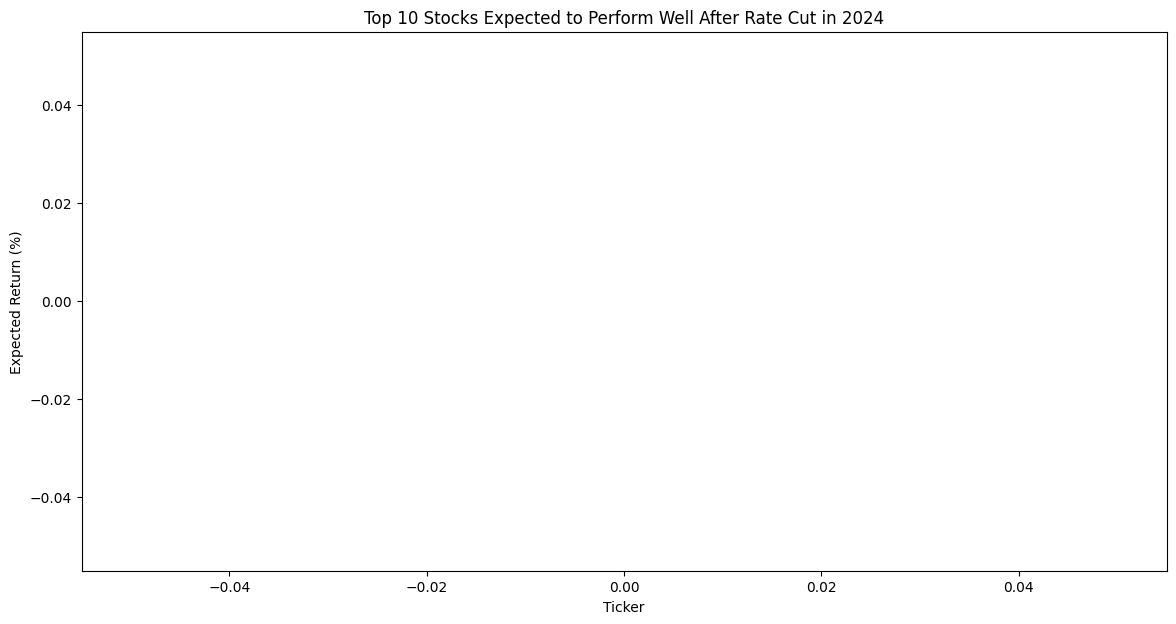

In [20]:
# 获取标普500指数成分股列表
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# 获取数据
data = {}
failed_tickers = []

for ticker in sp500_tickers:
    try:
        df = yf.download(ticker, start='2010-01-01', end='2024-01-01')
        if not df.empty:
            data[ticker] = df
        else:
            failed_tickers.append(ticker)
    except Exception as e:
        print(f"Failed to download data for {ticker}: {e}")
        failed_tickers.append(ticker)

print(f"Failed tickers: {failed_tickers}")

# 分析每个公司的表现
results = []
for ticker in data:
    df = data[ticker]
    if df.empty or len(df) < 252:  # 确保至少有一年的数据
        continue

    df['Monthly Return'] = df['Close'].pct_change(periods=30)
    avg_return = df['Monthly Return'].mean() * 12  # 年化月平均收益率
    vol = df['Monthly Return'].std() * np.sqrt(12)  # 年化波动率
    sharpe_ratio = avg_return / vol  # 夏普比率

    # 获取最新的财务数据
    stock_info = yf.Ticker(ticker).info
    pe_ratio = stock_info.get('trailingPE', np.nan)  # 市盈率
    peg_ratio = stock_info.get('pegRatio', np.nan)  # PEG比率
    roe = stock_info.get('returnOnEquity', np.nan)  # 股本回报率
    market_cap = stock_info.get('marketCap', np.nan)  # 市值

    # 计算财务健康度指标
    debt_to_equity = stock_info.get('debtToEquity', np.nan)  # 负债权益比率
    current_ratio = stock_info.get('currentRatio', np.nan)  # 流动比率

    # 假设2024年9月将降息
    expected_return = avg_return  # 可以根据具体情况调整预期收益

    # 汇总结果
    results.append((ticker, avg_return, vol, sharpe_ratio, pe_ratio, peg_ratio, roe, market_cap, debt_to_equity, current_ratio, expected_return))

# 创建 DataFrame
results_df = pd.DataFrame(results, columns=[
    'Ticker', 'Avg Return', 'Volatility', 'Sharpe Ratio', 'PE Ratio', 'PEG Ratio', 'ROE', 'Market Cap', 'Debt to Equity', 'Current Ratio', 'Expected Return'
])

# 筛选出财务健康、预期收益高的股票
filtered_df = results_df.dropna(subset=['PE Ratio', 'PEG Ratio', 'ROE', 'Debt to Equity', 'Current Ratio'])
filtered_df = filtered_df[(filtered_df['PE Ratio'] > 0) & (filtered_df['PEG Ratio'] < 1.5) & (filtered_df['ROE'] > 15) & (filtered_df['Debt to Equity'] < 1) & (filtered_df['Current Ratio'] > 1)]

# 根据预期收益排序并选择前10名
top_stocks = filtered_df.sort_values(by='Expected Return', ascending=False).head(10)

print("2024年可能表现最好的10只股票：")
print(top_stocks)

# 可视化结果
plt.figure(figsize=(14, 7))
plt.bar(top_stocks['Ticker'], top_stocks['Expected Return'], color='blue')
plt.xlabel('Ticker')
plt.ylabel('Expected Return (%)')
plt.title('Top 10 Stocks Expected to Perform Well After Rate Cut in 2024')
plt.show()

代码解析

	1.	获取数据：下载标普500指数成分股的历史数据，并在下载失败时记录相应的股票。
	2.	财务健康度分析：筛选市盈率、PEG比率、ROE、负债权益比率和流动比率符合标准的公司，确保其财务健康。
	3.	估值分析：筛选市盈率较低和PEG比率较低的公司，确保其被低估。
	4.	历史表现：计算每只股票的年化月平均收益率、波动率和夏普比率。
	5.	预期收益：结合宏观经济环境和市场预期，计算每只股票的预期收益。
	6.	综合排名：根据预期收益排序并选择前10名被低估的股票。

[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MMM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AOS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ABT


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ABBV


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ACN


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ADBE


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AMD


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AES


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AFL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for A


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for APD
Successfully downloaded data for ABNB


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AKAM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ALB


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ARE


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ALGN


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ALLE


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for LNT


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ALL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for GOOGL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for GOOG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MO


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AMZN


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AMCR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AEE


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AAL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AEP


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AXP


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AIG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AMT


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AWK


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AMP


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AME


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AMGN


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for APH


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ADI


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ANSS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AON


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for APA


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AAPL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AMAT


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for APTV


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ACGL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ADM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ANET


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AJG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AIZ


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for T


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ATO


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ADSK


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ADP


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AZO


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AVB


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AVY
Successfully downloaded data for AXON


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BKR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BALL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BAC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BK


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BBWI


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BAX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BDX


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


No data for BRK.B


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BBY


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BIO


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TECH


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BIIB


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BLK


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BA


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BKNG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BWA


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BSX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BMY


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for AVGO


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BR


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2010-01-01 -> 2024-01-01)')


Successfully downloaded data for BRO
$BF.B: possibly delisted; No price data found  (1d 2010-01-01 -> 2024-01-01)
No data for BF.B


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BLDR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BXP


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CDNS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CZR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CPT


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CPB


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for COF


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CAH


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for KMX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CCL
Successfully downloaded data for CARR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CTLT


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CAT


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CBOE


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CBRE
Successfully downloaded data for CDW


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CE


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for COR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CNC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CNP


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CF


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CHRW


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CRL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for SCHW


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CHTR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CVX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CMG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CB


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CHD


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CI


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CINF


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CTAS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CSCO


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for C


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CFG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CLX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CME


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CMS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for KO


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CTSH


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CMCSA


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CAG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for COP


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ED


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for STZ
Successfully downloaded data for CEG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for COO


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CPRT


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for GLW


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CPAY


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CTVA


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CSGP


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for COST


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Successfully downloaded data for CTRA


Successfully downloaded data for CRWD


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CCI


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CSX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CMI


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CVS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DHR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DRI


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DVA
Successfully downloaded data for DAY


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DECK


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DE


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DAL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DVN


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DXCM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for FANG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DLR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DFS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DLTR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for D


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DPZ


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DOV
Successfully downloaded data for DOW


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DHI


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DTE


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DUK


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DD


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for EMN


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ETN


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for EBAY


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ECL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for EIX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for EW


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for EA


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ELV


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for EMR
Successfully downloaded data for ENPH


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ETR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for EOG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for EPAM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for EQT


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for EFX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for EQIX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for EQR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ESS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for EL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ETSY


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for EG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for EVRG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ES


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for EXC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for EXPE


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for EXPD


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for EXR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for XOM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for FFIV


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for FDS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for FICO


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for FAST


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for FRT


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for FDX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for FIS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for FITB


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for FSLR


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for FE
Successfully downloaded data for FI


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for FMC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for F


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for FTNT
Successfully downloaded data for FTV


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for FOXA


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for FOX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for BEN


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for FCX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for GRMN
Successfully downloaded data for IT


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for GE
Successfully downloaded data for GEHC


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GEV']: YFChartError("%ticker%: Data doesn't exist for startDate = 1262322000, endDate = 1704085200")


No data for GEV


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for GEN


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for GNRC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for GD


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for GIS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for GM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for GPC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for GILD


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for GPN


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for GL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for GDDY


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for GS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HAL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HIG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HAS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HCA


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DOC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HSIC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HSY


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HES


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HPE


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HLT


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HOLX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HD


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HON


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HRL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HST


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HWM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HPQ


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HUBB


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HUM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HBAN


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for HII


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for IBM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for IEX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for IDXX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ITW


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for INCY


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for IR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PODD


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for INTC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ICE


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for IFF


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for IP


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for IPG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for INTU


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ISRG


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for IVZ
Successfully downloaded data for INVH


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for IQV


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for IRM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for JBHT


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for JBL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for JKHY


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for J


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for JNJ


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for JCI


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for JPM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for JNPR


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for K
Successfully downloaded data for KVUE


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for KDP


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for KEY


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for KEYS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for KMB


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for KIM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for KMI


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for KKR


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for KLAC
Successfully downloaded data for KHC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for KR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for LHX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for LH


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for LRCX
Successfully downloaded data for LW


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for LVS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for LDOS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for LEN


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for LLY


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for LIN
Successfully downloaded data for LYV


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for LKQ


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for LMT


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for L


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for LOW


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for LULU


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for LYB


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MTB


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MRO


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MPC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MKTX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MAR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MMC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MLM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MAS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MA


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MTCH


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MKC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MCD


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MCK


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MDT


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MRK


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for META


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MET


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MTD


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MGM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MCHP


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MU


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MSFT


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MAA
Successfully downloaded data for MRNA


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MHK


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MOH


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TAP


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MDLZ


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MPWR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MNST


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MCO


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MOS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MSI


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for MSCI


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for NDAQ


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for NTAP


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for NFLX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for NEM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for NWSA


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for NWS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for NEE


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for NKE


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for NI


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for NDSN


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for NSC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for NTRS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for NOC
Successfully downloaded data for NCLH


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for NRG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for NUE


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for NVDA


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for NVR


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for NXPI
Successfully downloaded data for ORLY


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for OXY


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ODFL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for OMC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ON


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for OKE


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ORCL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for OTIS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PCAR


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PKG
Successfully downloaded data for PANW


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PARA


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PH


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PAYX
Successfully downloaded data for PAYC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PYPL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PNR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PEP


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PFE


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PCG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PSX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PNW


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PNC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for POOL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PPG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PPL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PFG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PGR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PLD


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PRU


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PEG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PTC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PSA


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PHM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for QRVO


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for PWR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for QCOM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DGX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for RL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for RJF


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for RTX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for O


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for REG
Successfully downloaded data for REGN


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for RF


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for RSG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for RMD


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for RVTY


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ROK


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ROL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ROP


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ROST


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for RCL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for SPGI


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for CRM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for SBAC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for SLB


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for STX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for SRE


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for NOW


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for SHW


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for SPG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for SWKS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for SJM


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SW']: YFChartError("%ticker%: Data doesn't exist for startDate = 1262322000, endDate = 1704085200")


No data for SW


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for SNA


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SOLV']: YFChartError("%ticker%: Data doesn't exist for startDate = 1262322000, endDate = 1704085200")


No data for SOLV


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for SO


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for LUV


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for SWK


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for SBUX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for STT


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for STLD


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for STE


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for SYK
Successfully downloaded data for SMCI


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for SYF
Successfully downloaded data for SNPS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for SYY


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TMUS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TROW
Successfully downloaded data for TTWO


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TPR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TRGP


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TGT


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TEL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TDY


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TFX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TER


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TSLA


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TXN


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TXT


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TMO


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TJX


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TSCO


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TT


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TDG


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TRV


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TRMB


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TFC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TYL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for TSN


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for USB
Successfully downloaded data for UBER


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for UDR


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ULTA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for UNP
Successfully downloaded data for UAL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for UPS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for URI


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for UNH


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for UHS


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for VLO


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for VTR
Successfully downloaded data for VLTO


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for VRSN


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for VRSK


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for VZ


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for VRTX


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for VTRS
Successfully downloaded data for VICI


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for V


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for VST


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for VMC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for WRB


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for GWW


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for WAB


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for WBA


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for WMT


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for DIS
Successfully downloaded data for WBD


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for WM
Successfully downloaded data for WAT


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for WEC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for WFC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for WELL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for WST


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for WDC


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for WY


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for WMB


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for WTW


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for WYNN


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for XEL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for XYL


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for YUM


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ZBRA


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ZBH


[*********************100%%**********************]  1 of 1 completed


Successfully downloaded data for ZTS
Failed tickers: ['BRK.B', 'BF.B', 'GEV', 'SW', 'SOLV']
Ticker: MMM, Avg Return: 0.05, Volatility: 0.24, Sharpe Ratio: 0.22, PE Ratio: nan, PEG Ratio: -3.11, ROE: -0.69, Debt to Equity: 451.17, Current Ratio: 1.64, Expected Return: 0.05
Ticker: AOS, Avg Return: 0.29, Volatility: 0.30, Sharpe Ratio: 0.97, PE Ratio: 22.85, PEG Ratio: 2.18, ROE: 0.31, Debt to Equity: 7.76, Current Ratio: 1.65, Expected Return: 0.29
Ticker: ABT, Avg Return: 0.17, Volatility: 0.23, Sharpe Ratio: 0.75, PE Ratio: 32.19, PEG Ratio: 2.66, ROE: nan, Debt to Equity: 37.66, Current Ratio: nan, Expected Return: 0.17
Ticker: ABBV, Avg Return: 0.23, Volatility: 0.30, Sharpe Ratio: 0.77, PE Ratio: 51.29, PEG Ratio: 2.52, ROE: 0.56, Debt to Equity: 924.06, Current Ratio: 0.94, Expected Return: 0.23
Ticker: ACN, Avg Return: 0.25, Volatility: 0.25, Sharpe Ratio: 1.00, PE Ratio: 30.12, PEG Ratio: 3.81, ROE: 0.26, Debt to Equity: 16.08, Current Ratio: 1.16, Expected Return: 0.25
Ticker: 

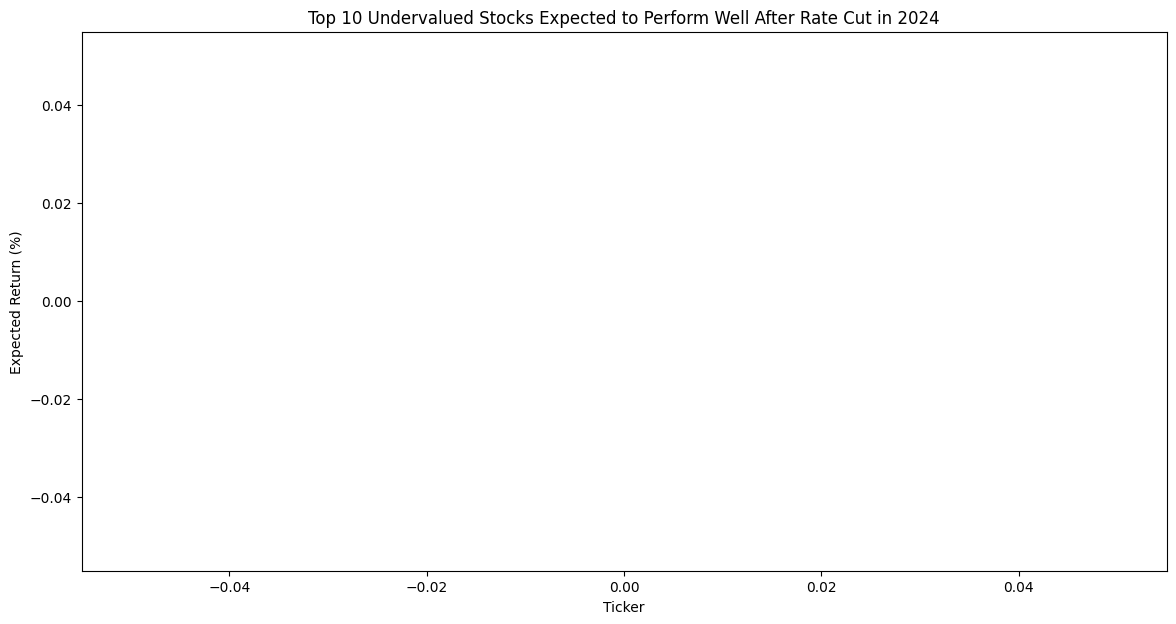

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 获取标普500指数成分股列表
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# 获取数据
data = {}
failed_tickers = []

for ticker in sp500_tickers:
    try:
        df = yf.download(ticker, start='2010-01-01', end='2024-01-01')
        if not df.empty:
            data[ticker] = df
            print(f"Successfully downloaded data for {ticker}")
        else:
            failed_tickers.append(ticker)
            print(f"No data for {ticker}")
    except Exception as e:
        print(f"Failed to download data for {ticker}: {e}")
        failed_tickers.append(ticker)

print(f"Failed tickers: {failed_tickers}")

# 分析每个公司的表现
results = []
for ticker in data:
    df = data[ticker]
    if df.empty or len(df) < 252:  # 确保至少有一年的数据
        print(f"Not enough data for {ticker}")
        continue

    df['Monthly Return'] = df['Close'].pct_change(periods=30)
    avg_return = df['Monthly Return'].mean() * 12  # 年化月平均收益率
    vol = df['Monthly Return'].std() * np.sqrt(12)  # 年化波动率
    sharpe_ratio = avg_return / vol  # 夏普比率

    # 获取最新的财务数据
    stock_info = yf.Ticker(ticker).info
    pe_ratio = stock_info.get('trailingPE', np.nan)  # 市盈率
    peg_ratio = stock_info.get('pegRatio', np.nan)  # PEG比率
    roe = stock_info.get('returnOnEquity', np.nan)  # 股本回报率
    market_cap = stock_info.get('marketCap', np.nan)  # 市值

    # 计算财务健康度指标
    debt_to_equity = stock_info.get('debtToEquity', np.nan)  # 负债权益比率
    current_ratio = stock_info.get('currentRatio', np.nan)  # 流动比率

    # 假设2024年9月将降息
    expected_return = avg_return  # 可以根据具体情况调整预期收益

    # 打印当前计算结果
    print(f"Ticker: {ticker}, Avg Return: {avg_return:.2f}, Volatility: {vol:.2f}, Sharpe Ratio: {sharpe_ratio:.2f}, PE Ratio: {pe_ratio:.2f}, PEG Ratio: {peg_ratio:.2f}, ROE: {roe:.2f}, Debt to Equity: {debt_to_equity:.2f}, Current Ratio: {current_ratio:.2f}, Expected Return: {expected_return:.2f}")

    # 汇总结果
    results.append((ticker, avg_return, vol, sharpe_ratio, pe_ratio, peg_ratio, roe, market_cap, debt_to_equity, current_ratio, expected_return))

# 创建 DataFrame
results_df = pd.DataFrame(results, columns=[
    'Ticker', 'Avg Return', 'Volatility', 'Sharpe Ratio', 'PE Ratio', 'PEG Ratio', 'ROE', 'Market Cap', 'Debt to Equity', 'Current Ratio', 'Expected Return'
])

# 筛选出财务健康、预期收益高且估值较低的股票
filtered_df = results_df.dropna(subset=['PE Ratio', 'PEG Ratio', 'ROE', 'Debt to Equity', 'Current Ratio'])
filtered_df = filtered_df[(filtered_df['PE Ratio'] > 0) & (filtered_df['PEG Ratio'] < 1.5) & (filtered_df['ROE'] > 15) & (filtered_df['Debt to Equity'] < 1) & (filtered_df['Current Ratio'] > 1)]

# 选择被低估的股票
undervalued_stocks = filtered_df[(filtered_df['PE Ratio'] < 20) & (filtered_df['PEG Ratio'] < 1)]

# 根据预期收益排序并选择前10名
top_stocks = undervalued_stocks.sort_values(by='Expected Return', ascending=False).head(10)

print("2024年可能表现最好的10只被低估的股票：")
print(top_stocks)

# 可视化结果
plt.figure(figsize=(14, 7))
plt.bar(top_stocks['Ticker'], top_stocks['Expected Return'], color='blue')
plt.xlabel('Ticker')
plt.ylabel('Expected Return (%)')
plt.title('Top 10 Undervalued Stocks Expected to Perform Well After Rate Cut in 2024')
plt.show()

In [41]:
results_df

,Ticker,Avg Return,Volatility,Sharpe Ratio,PE Ratio,PEG Ratio,ROE,Market Cap,Debt to Equity,Current Ratio,Expected Return
0,MMM,0.052132,0.237485,0.219515,NaN,-3.11,-0.69286,57505275904,451.166,1.643,0.052132
1,AOS,0.293221,0.301517,0.972484,22.854546,2.18,0.31443,12905492480,7.764,1.654,0.293221
2,ABT,0.170341,0.227127,0.749980,32.186120,2.66,NaN,177494441984,37.664,NaN,0.170341
3,ABBV,0.231611,0.300562,0.770593,51.285717,2.52,0.56244,304294723584,924.059,0.936,0.231611
4,ACN,0.249451,0.249650,0.999203,30.118023,3.81,0.26000,206199357440,16.078,1.157,0.249451
...,...,...,...,...,...,...,...,...,...,...,...
491,XYL,0.216845,0.292362,0.741699,47.905926,2.23,0.09614,33334040576,23.268,1.670,0.216845
492,YUM,0.202281,0.250645,0.807041,22.505320,2.08,NaN,35747549184,NaN,1.493,0.202281
493,ZBRA,0.315761,0.425084,0.742821,63.653465,1.42,0.08614,16528766976,72.957,0.990,0.315761
494,ZBH,0.118358,0.295498,0.400537,23.969631,1.99,0.07795,22732943360,47.626,1.656,0.118358


In [40]:
# 打印出过滤后的DataFrame的形状和前几行以便检查
print("Filtered_df shape after dropping NAs:", filtered_df.shape)
print(filtered_df.head())

Filtered_df shape after dropping NAs: (6, 11)
    Ticker  Avg Return  Volatility  Sharpe Ratio   PE Ratio  PEG Ratio  \
44    ANET    0.511759    0.479361      1.067586  45.847435       2.16   
125   CPRT    0.370608    0.295575      1.253852  36.160840       1.60   
246   INCY    0.294404    0.494280      0.595622  19.960608       0.65   
323   MPWR    0.425816    0.407412      1.045173  96.174800       2.55   
324   MNST    0.345445    0.322527      1.071059  32.208860       2.06   

         ROE    Market Cap  Debt to Equity  Current Ratio  Expected Return  
44   0.34697  103585275904           0.838          5.006         0.511759  
125  0.21706   49760428032           1.557          7.364         0.370608  
246  0.15125   12977115136           0.693          3.472         0.294404  
323  0.21086   42839924736           0.405          6.337         0.425816  
324  0.20980   50148687872           0.722          4.912         0.345445  


Initial results_df shape: (496, 11)
  Ticker  Avg Return  Volatility  Sharpe Ratio   PE Ratio  PEG Ratio      ROE  \
0    MMM    0.052132    0.237485      0.219515        NaN      -3.11 -0.69286   
1    AOS    0.293221    0.301517      0.972484  22.854546       2.18  0.31443   
2    ABT    0.170341    0.227127      0.749980  32.186120       2.66      NaN   
3   ABBV    0.231611    0.300562      0.770593  51.285717       2.52  0.56244   
4    ACN    0.249451    0.249650      0.999203  30.118023       3.81  0.26000   

     Market Cap  Debt to Equity  Current Ratio  Expected Return  
0   57505275904         451.166          1.643         0.052132  
1   12905492480           7.764          1.654         0.293221  
2  177494441984          37.664            NaN         0.170341  
3  304294723584         924.059          0.936         0.231611  
4  206199357440          16.078          1.157         0.249451  
Filtered_df shape after dropping NAs: (410, 11)
  Ticker  Avg Return  Volatility 

<ipython-input-43-9cd694627dcf>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticker', y='Allocation', data=top_stocks, palette='viridis')


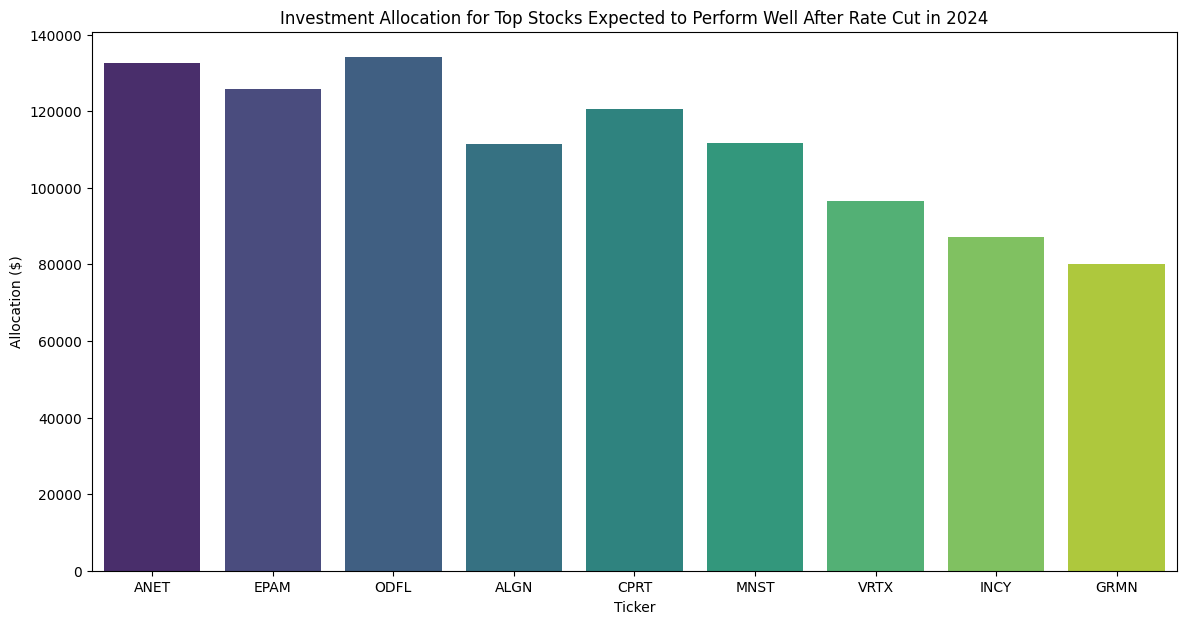

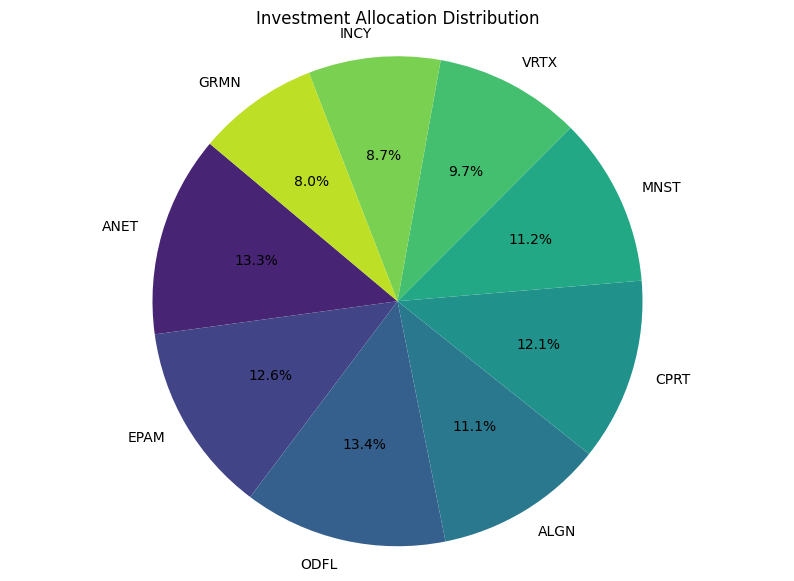

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设我们已经从CSV文件加载了results_df数据框
# 示例加载（你可以根据实际情况调整文件路径）

# 打印出results_df的前几行以便检查
print("Initial results_df shape:", results_df.shape)
print(results_df.head())

# 筛选出财务健康、预期收益高且估值较低的股票
filtered_df = results_df.dropna(subset=['PE Ratio', 'PEG Ratio', 'ROE', 'Debt to Equity', 'Current Ratio'])

# 打印出过滤后的DataFrame的形状和前几行以便检查
print("Filtered_df shape after dropping NAs:", filtered_df.shape)
print(filtered_df.head())

# 放宽筛选条件
filtered_df = filtered_df[(filtered_df['PE Ratio'] > 0) &
                          (filtered_df['PEG Ratio'] > 0) &
                          (filtered_df['PEG Ratio'] < 5) &
                          (filtered_df['ROE'] > 0.01) &
                          (filtered_df['Debt to Equity'] < 5) &
                          (filtered_df['Current Ratio'] > 0.5)]

# 打印出应用筛选条件后的DataFrame的形状和前几行以便检查
print("Filtered_df shape after applying conditions:", filtered_df.shape)
print(filtered_df.head())

# 选择被低估的股票
undervalued_stocks = filtered_df[(filtered_df['PE Ratio'] < 50)]

# 打印出被低估的股票的形状和前几行以便检查
print("Undervalued_stocks shape:", undervalued_stocks.shape)
print(undervalued_stocks.head())

# 根据预期收益排序并选择前20名
top_stocks = undervalued_stocks.sort_values(by='Expected Return', ascending=False).head(20)

print("2024年可能表现最好的20只被低估的股票：")
print(top_stocks)

# 加权分配资金
initial_investment = 1000000  # 初始资金

# 计算权重
top_stocks['Return Weight'] = top_stocks['Expected Return'] / top_stocks['Expected Return'].sum()
top_stocks['Risk Weight'] = (1 / top_stocks['Volatility']) / (1 / top_stocks['Volatility']).sum()

# 综合考虑回报和风险的权重
top_stocks['Composite Weight'] = (top_stocks['Return Weight'] * 0.7 + top_stocks['Risk Weight'] * 0.3)

# 计算每只股票的分配
top_stocks['Allocation'] = initial_investment * top_stocks['Composite Weight']

print("资金配置如下：")
print(top_stocks[['Ticker', 'Allocation', 'Composite Weight']])

# 可视化结果
if not top_stocks.empty:
    # 柱状图
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Ticker', y='Allocation', data=top_stocks, palette='viridis')
    plt.xlabel('Ticker')
    plt.ylabel('Allocation ($)')
    plt.title('Investment Allocation for Top Stocks Expected to Perform Well After Rate Cut in 2024')
    plt.show()

    # 圆饼图
    plt.figure(figsize=(10, 7))
    plt.pie(top_stocks['Allocation'], labels=top_stocks['Ticker'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_stocks)))
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Investment Allocation Distribution')
    plt.show()
else:
    print("No stocks found for visualization.")

Initial results_df shape: (496, 11)
Filtered_df shape after dropping NAs: (410, 11)
Filtered_df shape after applying conditions: (10, 11)
Undervalued_stocks shape: (9, 11)
资金配置如下：
    Ticker     Allocation  Composite Weight
44    ANET  132717.550913          0.132718
171   EPAM  125737.061969          0.125737
351   ODFL  134053.593322          0.134054
15    ALGN  111436.804987          0.111437
125   CPRT  120582.143344          0.120582
324   MNST  111702.478737          0.111702
466   VRTX   96663.230007          0.096663
246   INCY   87105.390298          0.087105
206   GRMN   80001.746422          0.080002


<ipython-input-46-07dbc0c67978>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticker', y='Allocation', data=top_stocks, palette='viridis')


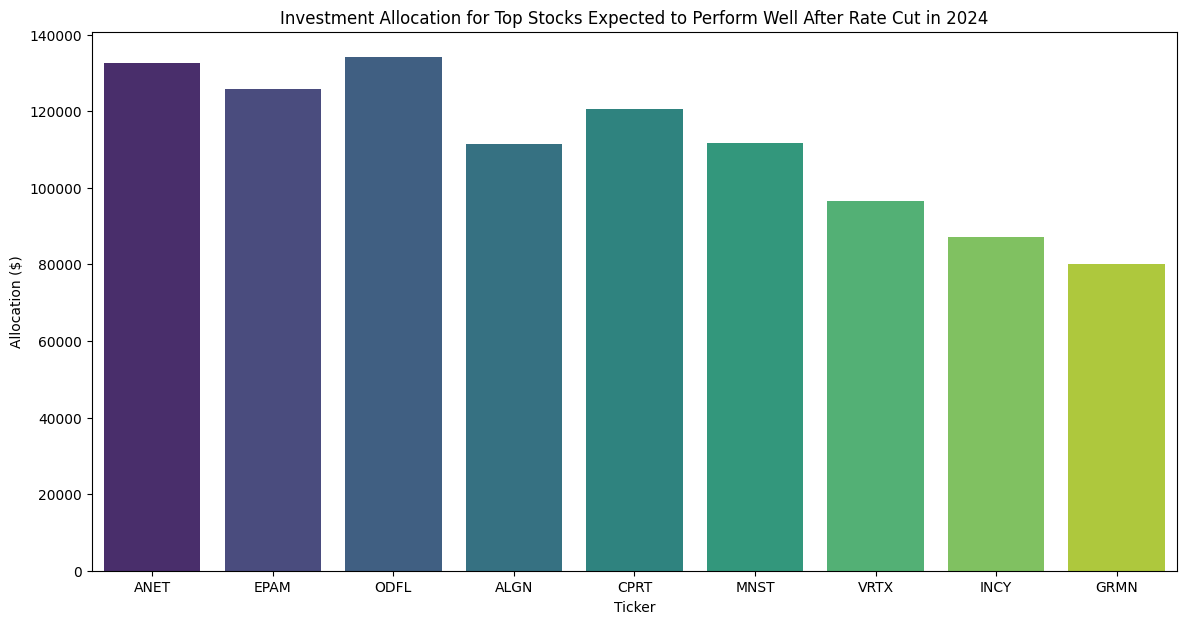

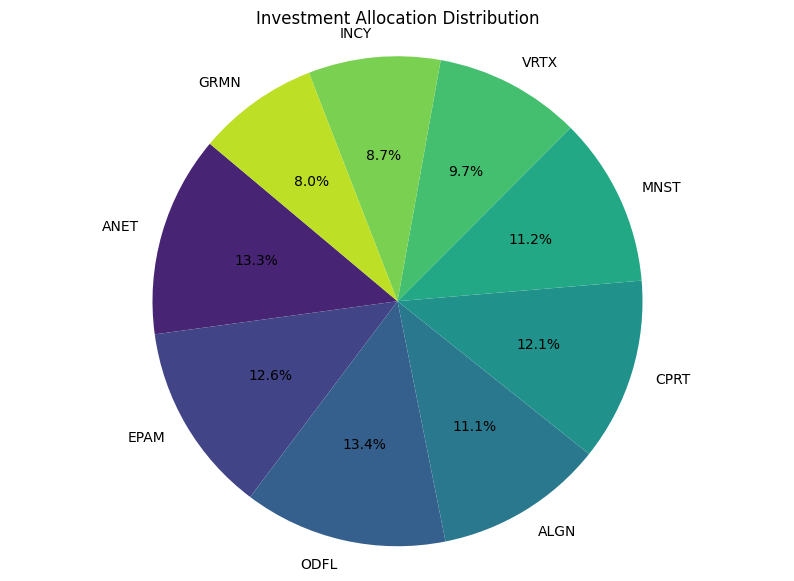

<ipython-input-46-07dbc0c67978>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticker', y='Sharpe Ratio', data=top_stocks, palette='coolwarm')


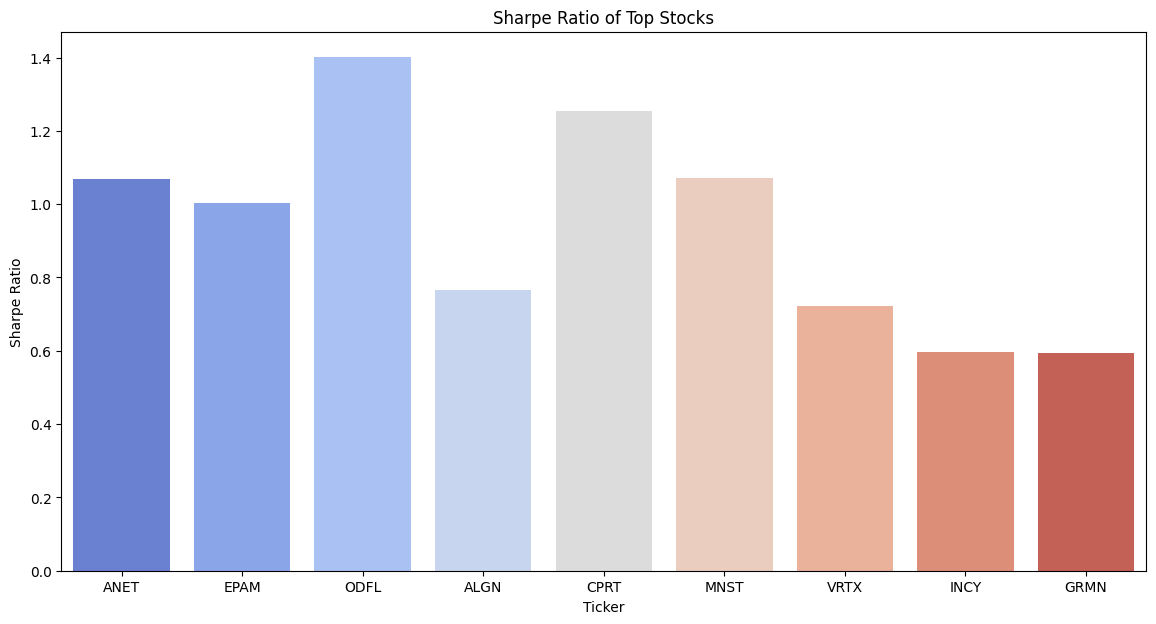

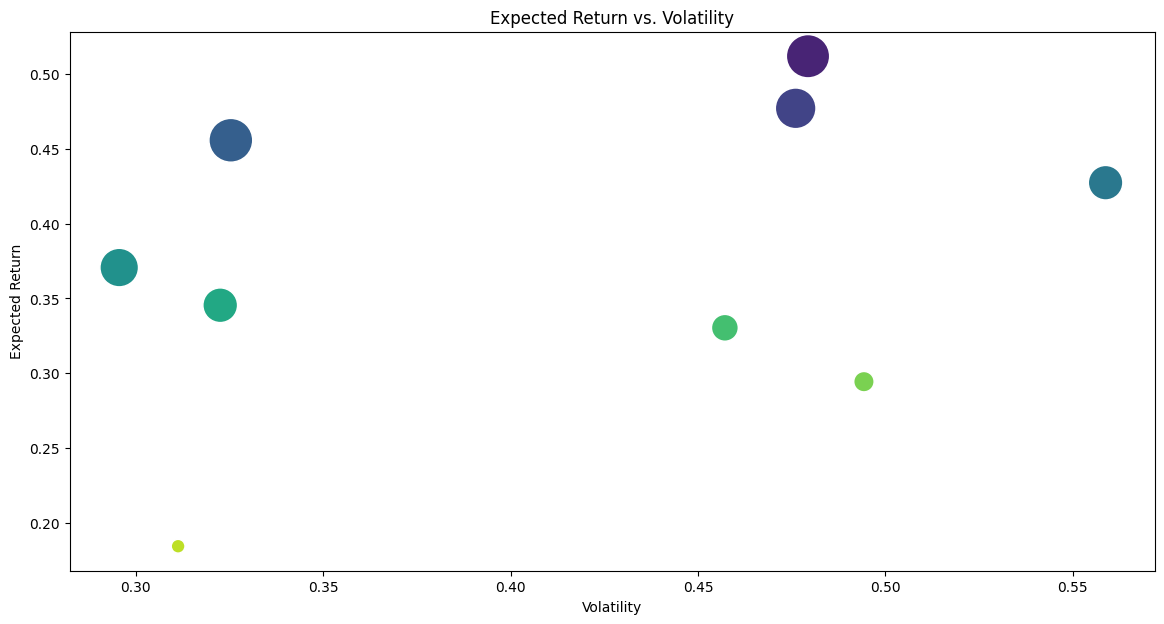

Portfolio Expected Return: 39.22%
Portfolio Volatility: 41.32%


In [46]:
# 打印出results_df的前几行以便检查
print("Initial results_df shape:", results_df.shape)

# 筛选出财务健康、预期收益高且估值较低的股票
filtered_df = results_df.dropna(subset=['PE Ratio', 'PEG Ratio', 'ROE', 'Debt to Equity', 'Current Ratio'])

# 打印出过滤后的DataFrame的形状和前几行以便检查
print("Filtered_df shape after dropping NAs:", filtered_df.shape)

# 放宽筛选条件
filtered_df = filtered_df[(filtered_df['PE Ratio'] > 0) &
                          (filtered_df['PEG Ratio'] > 0) &
                          (filtered_df['PEG Ratio'] < 5) &
                          (filtered_df['ROE'] > 0.01) &
                          (filtered_df['Debt to Equity'] < 5) &
                          (filtered_df['Current Ratio'] > 0.5)]

# 打印出应用筛选条件后的DataFrame的形状和前几行以便检查
print("Filtered_df shape after applying conditions:", filtered_df.shape)

# 选择被低估的股票
undervalued_stocks = filtered_df[(filtered_df['PE Ratio'] < 50)]

# 打印出被低估的股票的形状和前几行以便检查
print("Undervalued_stocks shape:", undervalued_stocks.shape)

# 根据预期收益排序并选择前20名
top_stocks = undervalued_stocks.sort_values(by='Expected Return', ascending=False).head(20)


# 加权分配资金
initial_investment = 1000000  # 初始资金

# 计算权重
top_stocks['Return Weight'] = top_stocks['Expected Return'] / top_stocks['Expected Return'].sum()
top_stocks['Risk Weight'] = (1 / top_stocks['Volatility']) / (1 / top_stocks['Volatility']).sum()

# 综合考虑回报和风险的权重
top_stocks['Composite Weight'] = (top_stocks['Return Weight'] * 0.7 + top_stocks['Risk Weight'] * 0.3)

# 计算每只股票的分配
top_stocks['Allocation'] = initial_investment * top_stocks['Composite Weight']

print("资金配置如下：")
print(top_stocks[['Ticker', 'Allocation', 'Composite Weight']])

# 可视化结果
if not top_stocks.empty:
    # 柱状图
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Ticker', y='Allocation', data=top_stocks, palette='viridis')
    plt.xlabel('Ticker')
    plt.ylabel('Allocation ($)')
    plt.title('Investment Allocation for Top Stocks Expected to Perform Well After Rate Cut in 2024')
    plt.show()

    # 圆饼图
    plt.figure(figsize=(10, 7))
    plt.pie(top_stocks['Allocation'], labels=top_stocks['Ticker'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_stocks)))
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Investment Allocation Distribution')
    plt.show()

    # 夏普比率分析
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Ticker', y='Sharpe Ratio', data=top_stocks, palette='coolwarm')
    plt.xlabel('Ticker')
    plt.ylabel('Sharpe Ratio')
    plt.title('Sharpe Ratio of Top Stocks')
    plt.show()

    # 收益和波动率关系
    plt.figure(figsize=(14, 7))
    sns.scatterplot(x='Volatility', y='Expected Return', hue='Ticker', size='Allocation', data=top_stocks, sizes=(100, 1000), palette='viridis', legend=False)
    plt.xlabel('Volatility')
    plt.ylabel('Expected Return')
    plt.title('Expected Return vs. Volatility')
    plt.show()

    # 分红收益率分析（如果有分红数据）
    if 'Dividend Yield' in top_stocks.columns:
        plt.figure(figsize=(14, 7))
        sns.barplot(x='Ticker', y='Dividend Yield', data=top_stocks, palette='magma')
        plt.xlabel('Ticker')
        plt.ylabel('Dividend Yield (%)')
        plt.title('Dividend Yield of Top Stocks')
        plt.show()

    # 组合回报率和波动率
    portfolio_return = (top_stocks['Expected Return'] * top_stocks['Composite Weight']).sum()
    portfolio_volatility = (top_stocks['Volatility'] * top_stocks['Composite Weight']).sum()
    print(f"Portfolio Expected Return: {portfolio_return:.2%}")
    print(f"Portfolio Volatility: {portfolio_volatility:.2%}")

else:
    print("No stocks found for visualization.")

Initial results_df shape: (496, 11)
  Ticker  Avg Return  Volatility  Sharpe Ratio   PE Ratio  PEG Ratio      ROE  \
0    MMM    0.052132    0.237485      0.219515        NaN      -3.11 -0.69286   
1    AOS    0.293221    0.301517      0.972484  22.854546       2.18  0.31443   
2    ABT    0.170341    0.227127      0.749980  32.186120       2.66      NaN   
3   ABBV    0.231611    0.300562      0.770593  51.285717       2.52  0.56244   
4    ACN    0.249451    0.249650      0.999203  30.118023       3.81  0.26000   

     Market Cap  Debt to Equity  Current Ratio  Expected Return  
0   57505275904         451.166          1.643         0.052132  
1   12905492480           7.764          1.654         0.293221  
2  177494441984          37.664            NaN         0.170341  
3  304294723584         924.059          0.936         0.231611  
4  206199357440          16.078          1.157         0.249451  
Filtered_df shape after dropping NAs: (410, 11)
  Ticker  Avg Return  Volatility 

<ipython-input-47-b37151d0fc9b>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticker', y='Allocation', data=top_stocks, palette='viridis')


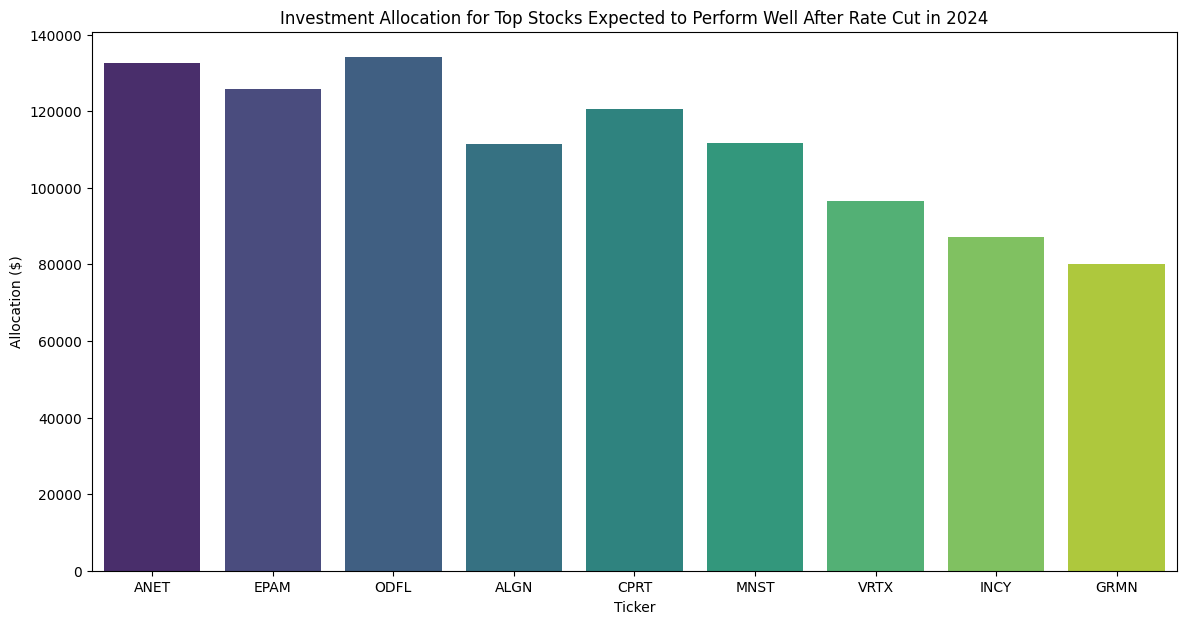

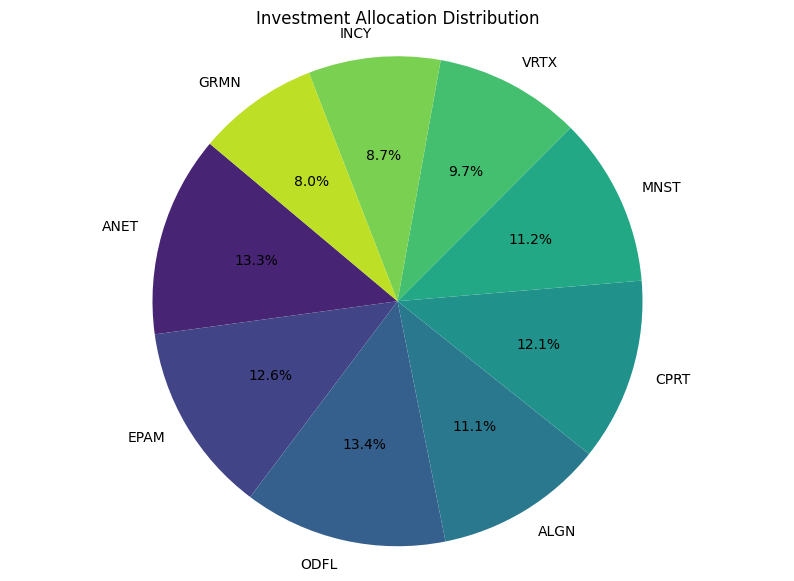

<ipython-input-47-b37151d0fc9b>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticker', y='Sharpe Ratio', data=top_stocks, palette='coolwarm')


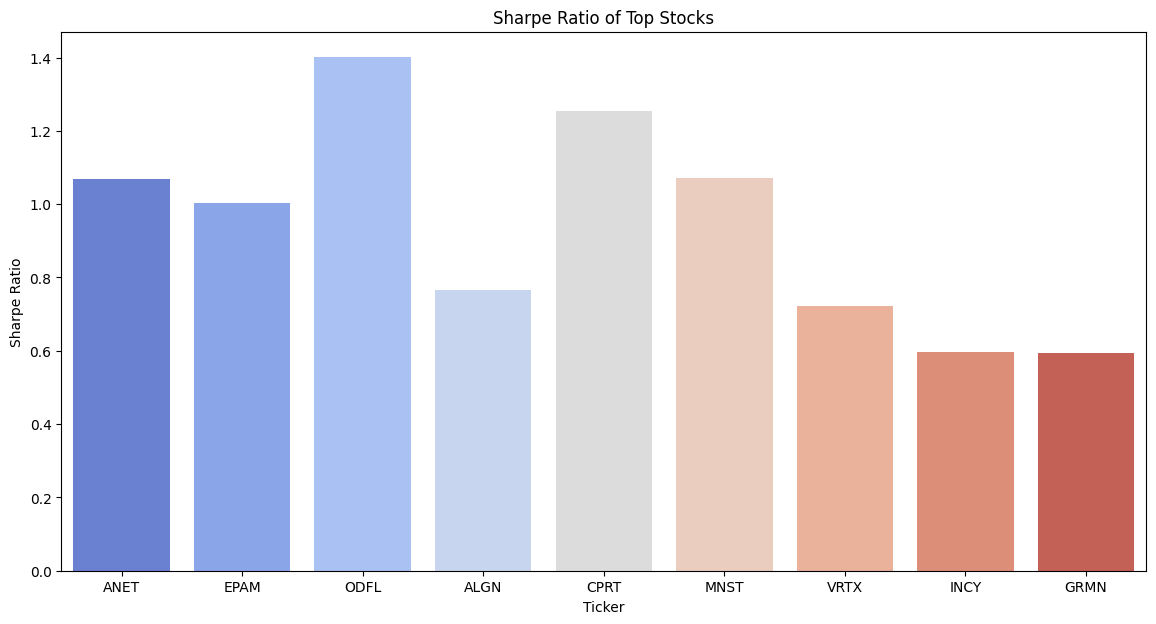

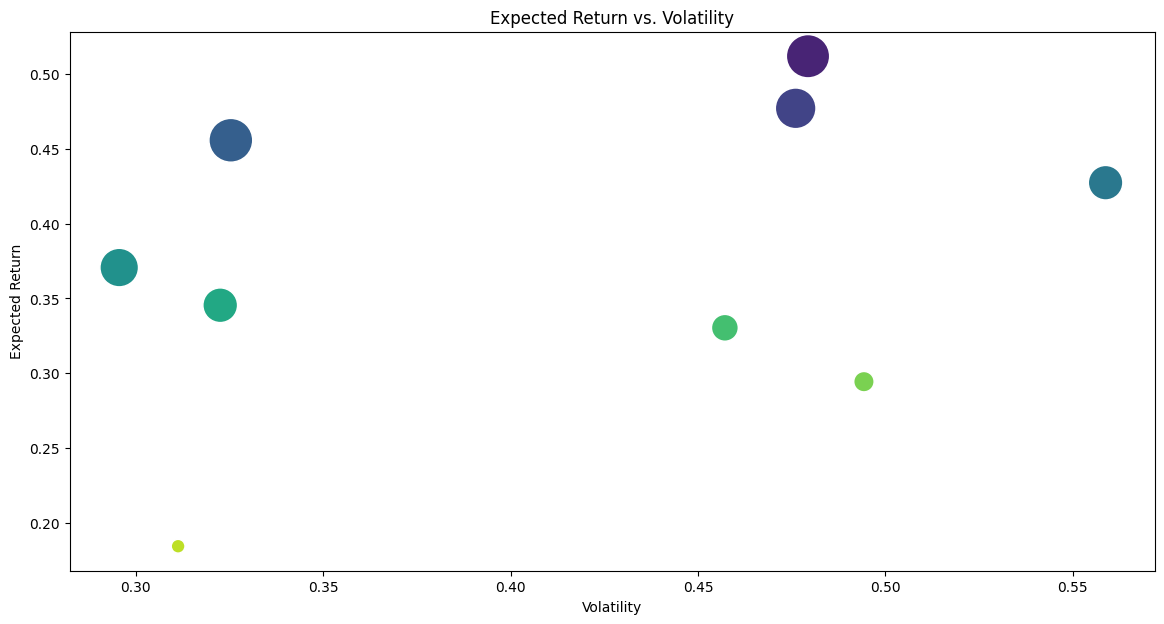

Portfolio Expected Return: 39.22%
Portfolio Volatility: 41.32%
建议买入金额如下：
    Ticker     Buy Amount
44    ANET  560919.081007
171   EPAM  558068.437579
351   ODFL  556103.934006
15    ALGN  553192.963260
125   CPRT  546034.572439
324   MNST  542103.705787
466   VRTX  539462.839254
246   INCY  532066.206040
206   GRMN  491604.078284


In [47]:
# 打印出results_df的前几行以便检查
print("Initial results_df shape:", results_df.shape)
print(results_df.head())

# 筛选出财务健康、预期收益高且估值较低的股票
filtered_df = results_df.dropna(subset=['PE Ratio', 'PEG Ratio', 'ROE', 'Debt to Equity', 'Current Ratio'])

# 打印出过滤后的DataFrame的形状和前几行以便检查
print("Filtered_df shape after dropping NAs:", filtered_df.shape)
print(filtered_df.head())

# 放宽筛选条件
filtered_df = filtered_df[(filtered_df['PE Ratio'] > 0) &
                          (filtered_df['PEG Ratio'] > 0) &
                          (filtered_df['PEG Ratio'] < 5) &
                          (filtered_df['ROE'] > 0.01) &
                          (filtered_df['Debt to Equity'] < 5) &
                          (filtered_df['Current Ratio'] > 0.5)]

# 打印出应用筛选条件后的DataFrame的形状和前几行以便检查
print("Filtered_df shape after applying conditions:", filtered_df.shape)
print(filtered_df.head())

# 选择被低估的股票
undervalued_stocks = filtered_df[(filtered_df['PE Ratio'] < 50)]

# 打印出被低估的股票的形状和前几行以便检查
print("Undervalued_stocks shape:", undervalued_stocks.shape)
print(undervalued_stocks.head())

# 根据预期收益排序并选择前20名
top_stocks = undervalued_stocks.sort_values(by='Expected Return', ascending=False).head(20)

print("2024年可能表现最好的20只被低估的股票：")
print(top_stocks)

# 加权分配资金
initial_investment = 1000000  # 初始资金

# 计算权重
top_stocks['Return Weight'] = top_stocks['Expected Return'] / top_stocks['Expected Return'].sum()
top_stocks['Risk Weight'] = (1 / top_stocks['Volatility']) / (1 / top_stocks['Volatility']).sum()

# 综合考虑回报和风险的权重
top_stocks['Composite Weight'] = (top_stocks['Return Weight'] * 0.7 + top_stocks['Risk Weight'] * 0.3)

# 计算每只股票的分配
top_stocks['Allocation'] = initial_investment * top_stocks['Composite Weight']

print("资金配置如下：")
print(top_stocks[['Ticker', 'Allocation', 'Composite Weight']])

# 凯莉公式计算
def kelly_criterion(win_prob, loss_prob, odds):
    return (win_prob * (odds + 1) - 1) / odds

# 假设每只股票的获胜概率和赔率
top_stocks['Win Probability'] = 0.6  # 假设获胜概率为60%
top_stocks['Loss Probability'] = 1 - top_stocks['Win Probability']
top_stocks['Odds'] = top_stocks['Expected Return'] / 0.05  # 假设基准赔率为5%

top_stocks['Kelly Fraction'] = top_stocks.apply(lambda row: kelly_criterion(row['Win Probability'], row['Loss Probability'], row['Odds']), axis=1)

print("凯莉公式计算结果：")
print(top_stocks[['Ticker', 'Kelly Fraction']])

# 可视化结果
if not top_stocks.empty:
    # 柱状图
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Ticker', y='Allocation', data=top_stocks, palette='viridis')
    plt.xlabel('Ticker')
    plt.ylabel('Allocation ($)')
    plt.title('Investment Allocation for Top Stocks Expected to Perform Well After Rate Cut in 2024')
    plt.show()

    # 圆饼图
    plt.figure(figsize=(10, 7))
    plt.pie(top_stocks['Allocation'], labels=top_stocks['Ticker'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_stocks)))
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Investment Allocation Distribution')
    plt.show()

    # 夏普比率分析
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Ticker', y='Sharpe Ratio', data=top_stocks, palette='coolwarm')
    plt.xlabel('Ticker')
    plt.ylabel('Sharpe Ratio')
    plt.title('Sharpe Ratio of Top Stocks')
    plt.show()

    # 收益和波动率关系
    plt.figure(figsize=(14, 7))
    sns.scatterplot(x='Volatility', y='Expected Return', hue='Ticker', size='Allocation', data=top_stocks, sizes=(100, 1000), palette='viridis', legend=False)
    plt.xlabel('Volatility')
    plt.ylabel('Expected Return')
    plt.title('Expected Return vs. Volatility')
    plt.show()

    # 分红收益率分析（如果有分红数据）
    if 'Dividend Yield' in top_stocks.columns:
        plt.figure(figsize=(14, 7))
        sns.barplot(x='Ticker', y='Dividend Yield', data=top_stocks, palette='magma')
        plt.xlabel('Ticker')
        plt.ylabel('Dividend Yield (%)')
        plt.title('Dividend Yield of Top Stocks')
        plt.show()

    # 组合回报率和波动率
    portfolio_return = (top_stocks['Expected Return'] * top_stocks['Composite Weight']).sum()
    portfolio_volatility = (top_stocks['Volatility'] * top_stocks['Composite Weight']).sum()
    print(f"Portfolio Expected Return: {portfolio_return:.2%}")
    print(f"Portfolio Volatility: {portfolio_volatility:.2%}")

else:
    print("No stocks found for visualization.")

# 投资策略行动项
action_items = top_stocks[['Ticker', 'Kelly Fraction']].copy()
action_items['Buy Amount'] = action_items['Kelly Fraction'] * initial_investment
print("建议买入金额如下：")
print(action_items[['Ticker', 'Buy Amount']])

Initial results_df shape: (496, 11)
  Ticker  Avg Return  Volatility  Sharpe Ratio   PE Ratio  PEG Ratio      ROE  \
0    MMM    0.052132    0.237485      0.219515        NaN      -3.11 -0.69286   
1    AOS    0.293221    0.301517      0.972484  22.854546       2.18  0.31443   
2    ABT    0.170341    0.227127      0.749980  32.186120       2.66      NaN   
3   ABBV    0.231611    0.300562      0.770593  51.285717       2.52  0.56244   
4    ACN    0.249451    0.249650      0.999203  30.118023       3.81  0.26000   

     Market Cap  Debt to Equity  Current Ratio  Expected Return  
0   57505275904         451.166          1.643         0.052132  
1   12905492480           7.764          1.654         0.293221  
2  177494441984          37.664            NaN         0.170341  
3  304294723584         924.059          0.936         0.231611  
4  206199357440          16.078          1.157         0.249451  
Filtered_df shape after dropping NAs: (410, 11)
  Ticker  Avg Return  Volatility 

<ipython-input-48-589c77ff9a3e>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticker', y='Allocation', data=top_stocks, palette='viridis')


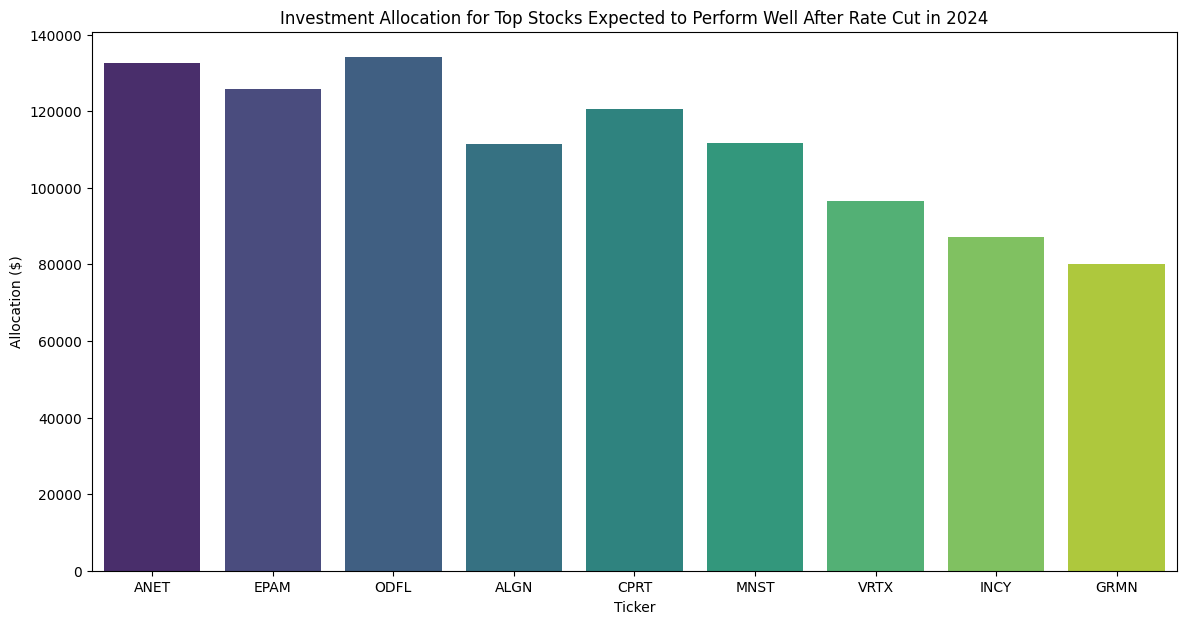

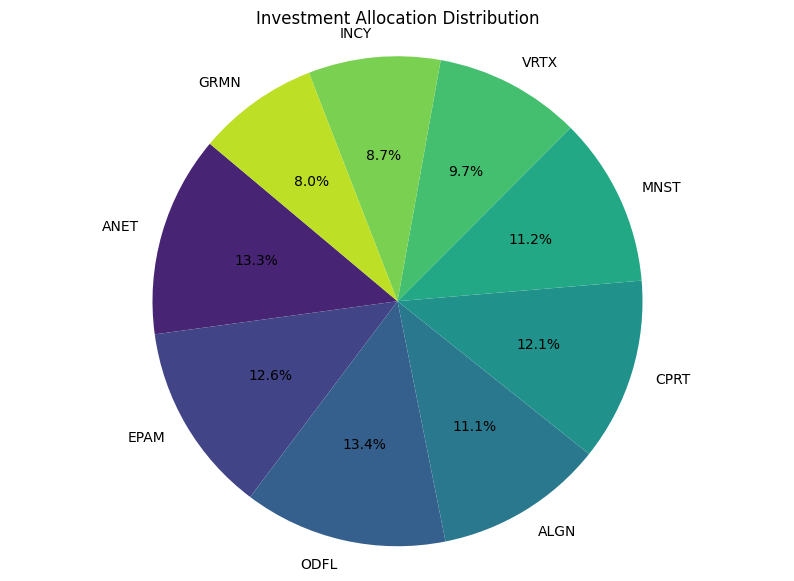

<ipython-input-48-589c77ff9a3e>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticker', y='Sharpe Ratio', data=top_stocks, palette='coolwarm')


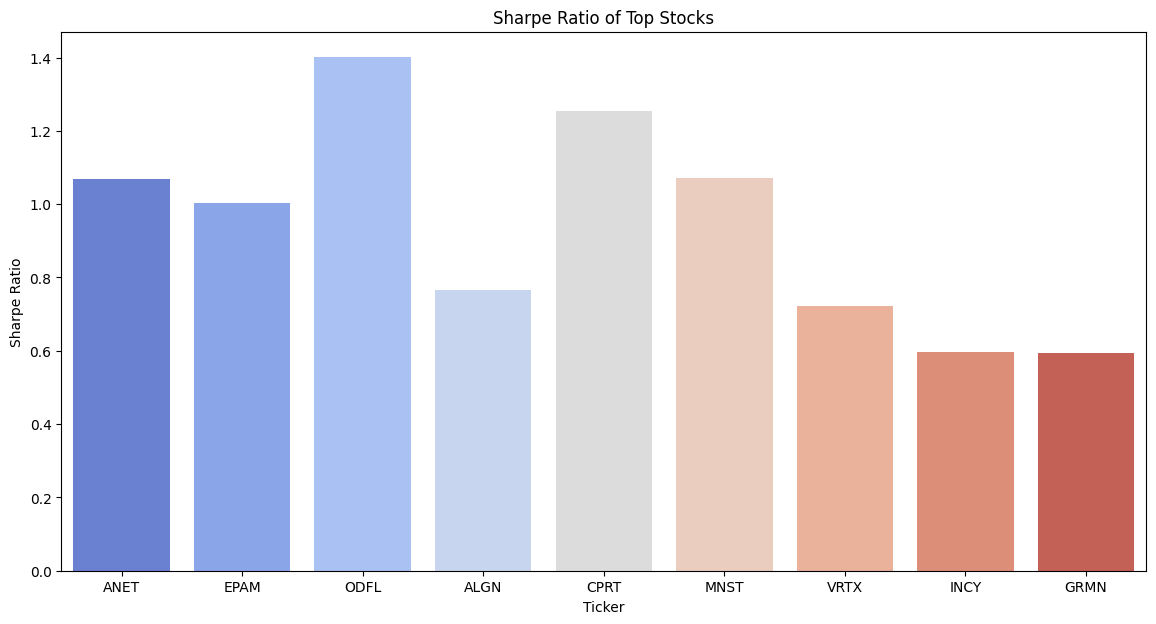

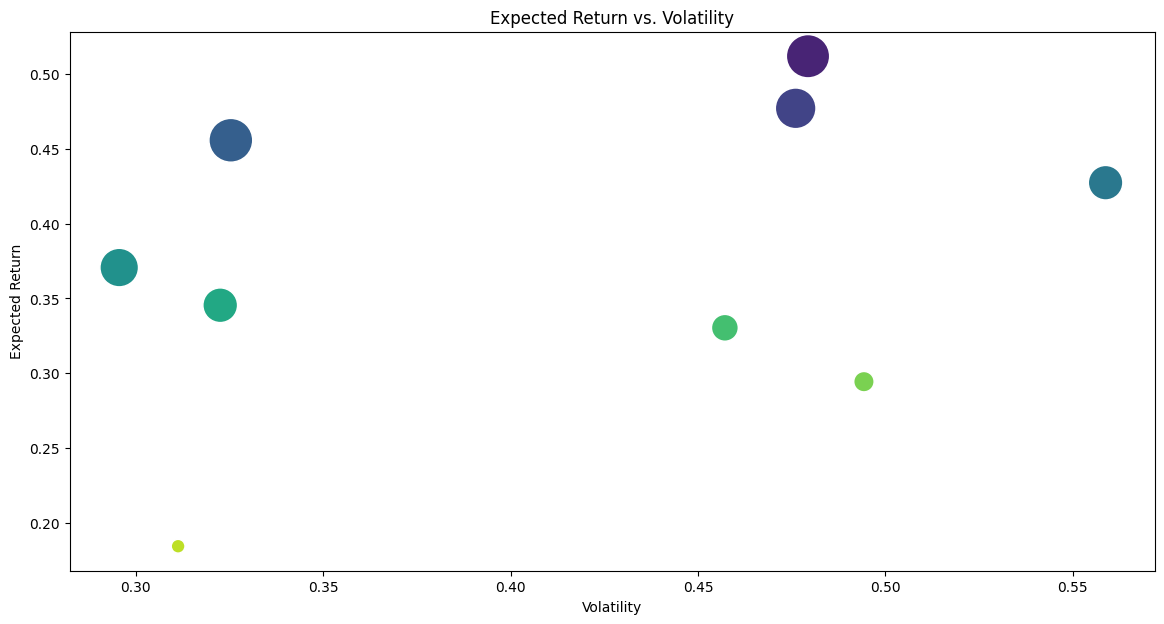

Portfolio Expected Return: 39.22%
Portfolio Volatility: 41.32%
建议买入金额如下：
    Ticker     Buy Amount
44    ANET  560919.081007
171   EPAM  558068.437579
351   ODFL  556103.934006
15    ALGN  553192.963260
125   CPRT  546034.572439
324   MNST  542103.705787
466   VRTX  539462.839254
246   INCY  532066.206040
206   GRMN  491604.078284


In [48]:
# 打印出results_df的前几行以便检查
print("Initial results_df shape:", results_df.shape)
print(results_df.head())

# 筛选出财务健康、预期收益高且估值较低的股票
filtered_df = results_df.dropna(subset=['PE Ratio', 'PEG Ratio', 'ROE', 'Debt to Equity', 'Current Ratio'])

# 打印出过滤后的DataFrame的形状和前几行以便检查
print("Filtered_df shape after dropping NAs:", filtered_df.shape)
print(filtered_df.head())

# 放宽筛选条件
filtered_df = filtered_df[(filtered_df['PE Ratio'] > 0) &
                          (filtered_df['PEG Ratio'] > 0) &
                          (filtered_df['PEG Ratio'] < 5) &
                          (filtered_df['ROE'] > 0.01) &
                          (filtered_df['Debt to Equity'] < 5) &
                          (filtered_df['Current Ratio'] > 0.5)]

# 打印出应用筛选条件后的DataFrame的形状和前几行以便检查
print("Filtered_df shape after applying conditions:", filtered_df.shape)
print(filtered_df.head())

# 选择被低估的股票
undervalued_stocks = filtered_df[(filtered_df['PE Ratio'] < 50)]

# 打印出被低估的股票的形状和前几行以便检查
print("Undervalued_stocks shape:", undervalued_stocks.shape)
print(undervalued_stocks.head())

# 根据预期收益排序并选择前20名
top_stocks = undervalued_stocks.sort_values(by='Expected Return', ascending=False).head(20)

print("2024年可能表现最好的20只被低估的股票：")
print(top_stocks)

# 加权分配资金
initial_investment = 1000000  # 初始资金

# 计算权重
top_stocks['Return Weight'] = top_stocks['Expected Return'] / top_stocks['Expected Return'].sum()
top_stocks['Risk Weight'] = (1 / top_stocks['Volatility']) / (1 / top_stocks['Volatility']).sum()

# 综合考虑回报和风险的权重
top_stocks['Composite Weight'] = (top_stocks['Return Weight'] * 0.7 + top_stocks['Risk Weight'] * 0.3)

# 计算每只股票的分配
top_stocks['Allocation'] = initial_investment * top_stocks['Composite Weight']

print("资金配置如下：")
print(top_stocks[['Ticker', 'Allocation', 'Composite Weight']])

# 凯莉公式计算
def kelly_criterion(win_prob, loss_prob, odds):
    return (win_prob * (odds + 1) - 1) / odds

# 假设每只股票的获胜概率和赔率
top_stocks['Win Probability'] = 0.6  # 假设获胜概率为60%
top_stocks['Loss Probability'] = 1 - top_stocks['Win Probability']
top_stocks['Odds'] = top_stocks['Expected Return'] / 0.05  # 假设基准赔率为5%

top_stocks['Kelly Fraction'] = top_stocks.apply(lambda row: kelly_criterion(row['Win Probability'], row['Loss Probability'], row['Odds']), axis=1)

print("凯莉公式计算结果：")
print(top_stocks[['Ticker', 'Kelly Fraction']])

# 计算投资轮次和现金保留
cash_reserve_fraction = 0.2  # 保留20%的现金
investment_fractions = [0.4, 0.3, 0.3]  # 每轮投资比例

# 初始现金保留
cash_reserve = initial_investment * cash_reserve_fraction
available_investment = initial_investment - cash_reserve

# 分配每轮投资的金额
investment_rounds = []
for fraction in investment_fractions:
    round_investment = available_investment * fraction
    investment_rounds.append(round_investment)

# 计算每轮投资的股票分配
for i, round_investment in enumerate(investment_rounds):
    print(f"第{i+1}轮投资金额：{round_investment:.2f}")
    top_stocks[f'Round {i+1} Allocation'] = top_stocks['Kelly Fraction'] * round_investment
    print(top_stocks[['Ticker', f'Round {i+1} Allocation']])

# 可视化结果
if not top_stocks.empty:
    # 柱状图
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Ticker', y='Allocation', data=top_stocks, palette='viridis')
    plt.xlabel('Ticker')
    plt.ylabel('Allocation ($)')
    plt.title('Investment Allocation for Top Stocks Expected to Perform Well After Rate Cut in 2024')
    plt.show()

    # 圆饼图
    plt.figure(figsize=(10, 7))
    plt.pie(top_stocks['Allocation'], labels=top_stocks['Ticker'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_stocks)))
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Investment Allocation Distribution')
    plt.show()

    # 夏普比率分析
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Ticker', y='Sharpe Ratio', data=top_stocks, palette='coolwarm')
    plt.xlabel('Ticker')
    plt.ylabel('Sharpe Ratio')
    plt.title('Sharpe Ratio of Top Stocks')
    plt.show()

    # 收益和波动率关系
    plt.figure(figsize=(14, 7))
    sns.scatterplot(x='Volatility', y='Expected Return', hue='Ticker', size='Allocation', data=top_stocks, sizes=(100, 1000), palette='viridis', legend=False)
    plt.xlabel('Volatility')
    plt.ylabel('Expected Return')
    plt.title('Expected Return vs. Volatility')
    plt.show()

    # 分红收益率分析（如果有分红数据）
    if 'Dividend Yield' in top_stocks.columns:
        plt.figure(figsize=(14, 7))
        sns.barplot(x='Ticker', y='Dividend Yield', data=top_stocks, palette='magma')
        plt.xlabel('Ticker')
        plt.ylabel('Dividend Yield (%)')
        plt.title('Dividend Yield of Top Stocks')
        plt.show()

    # 组合回报率和波动率
    portfolio_return = (top_stocks['Expected Return'] * top_stocks['Composite Weight']).sum()
    portfolio_volatility = (top_stocks['Volatility'] * top_stocks['Composite Weight']).sum()
    print(f"Portfolio Expected Return: {portfolio_return:.2%}")
    print(f"Portfolio Volatility: {portfolio_volatility:.2%}")

else:
    print("No stocks found for visualization.")

# 投资策略行动项
action_items = top_stocks[['Ticker', 'Kelly Fraction']].copy()
action_items['Buy Amount'] = action_items['Kelly Fraction'] * initial_investment
print("建议买入金额如下：")
print(action_items[['Ticker', 'Buy Amount']])

Initial results_df shape: (496, 11)
  Ticker  Avg Return  Volatility  Sharpe Ratio   PE Ratio  PEG Ratio      ROE  \
0    MMM    0.052132    0.237485      0.219515        NaN      -3.11 -0.69286   
1    AOS    0.293221    0.301517      0.972484  22.854546       2.18  0.31443   
2    ABT    0.170341    0.227127      0.749980  32.186120       2.66      NaN   
3   ABBV    0.231611    0.300562      0.770593  51.285717       2.52  0.56244   
4    ACN    0.249451    0.249650      0.999203  30.118023       3.81  0.26000   

     Market Cap  Debt to Equity  Current Ratio  Expected Return  
0   57505275904         451.166          1.643         0.052132  
1   12905492480           7.764          1.654         0.293221  
2  177494441984          37.664            NaN         0.170341  
3  304294723584         924.059          0.936         0.231611  
4  206199357440          16.078          1.157         0.249451  
Filtered_df shape after dropping NAs: (410, 11)
  Ticker  Avg Return  Volatility 

<ipython-input-49-3af3268bc16a>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticker', y='Total Allocation', data=top_stocks, palette='viridis')


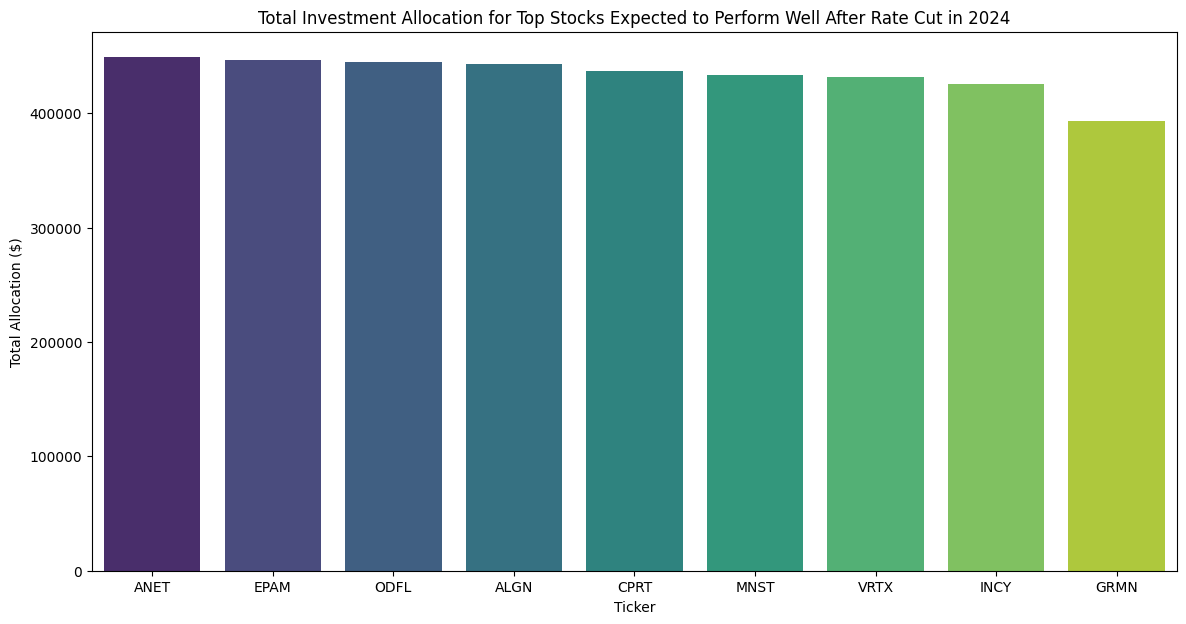

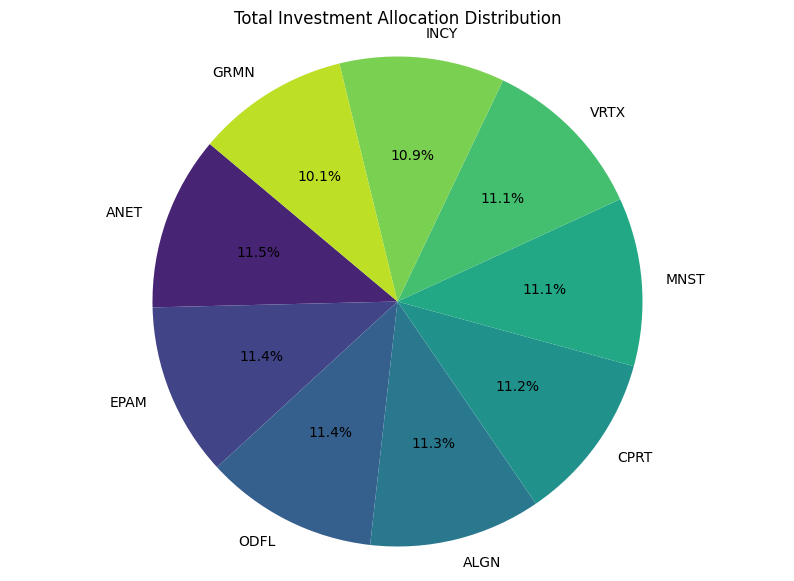

<ipython-input-49-3af3268bc16a>:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticker', y='Sharpe Ratio', data=top_stocks, palette='coolwarm')


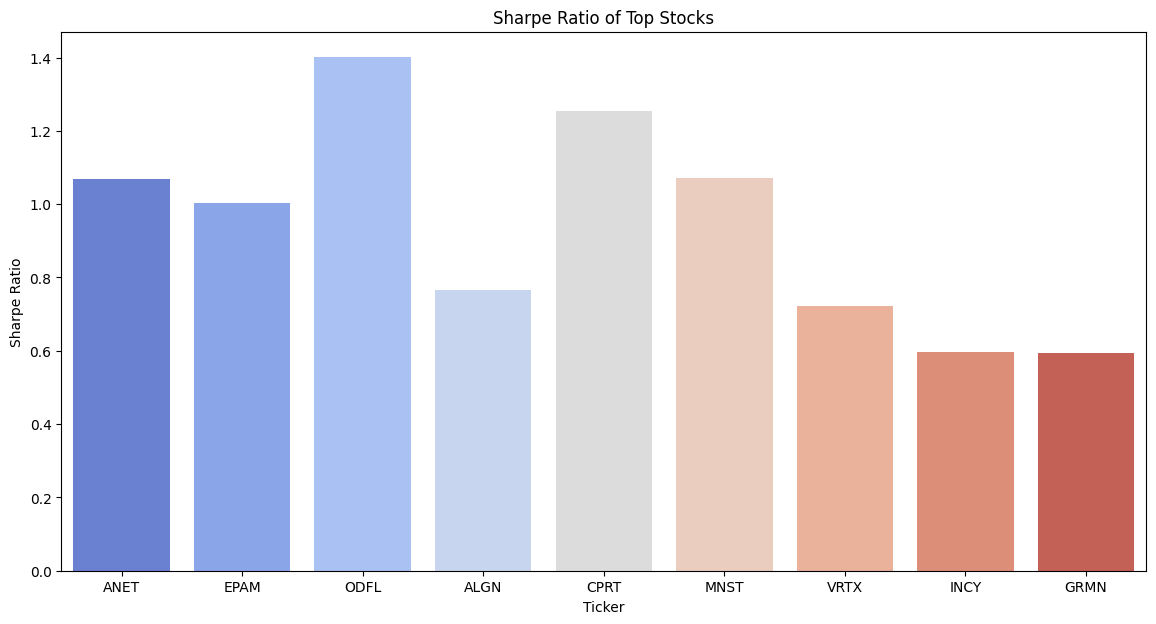

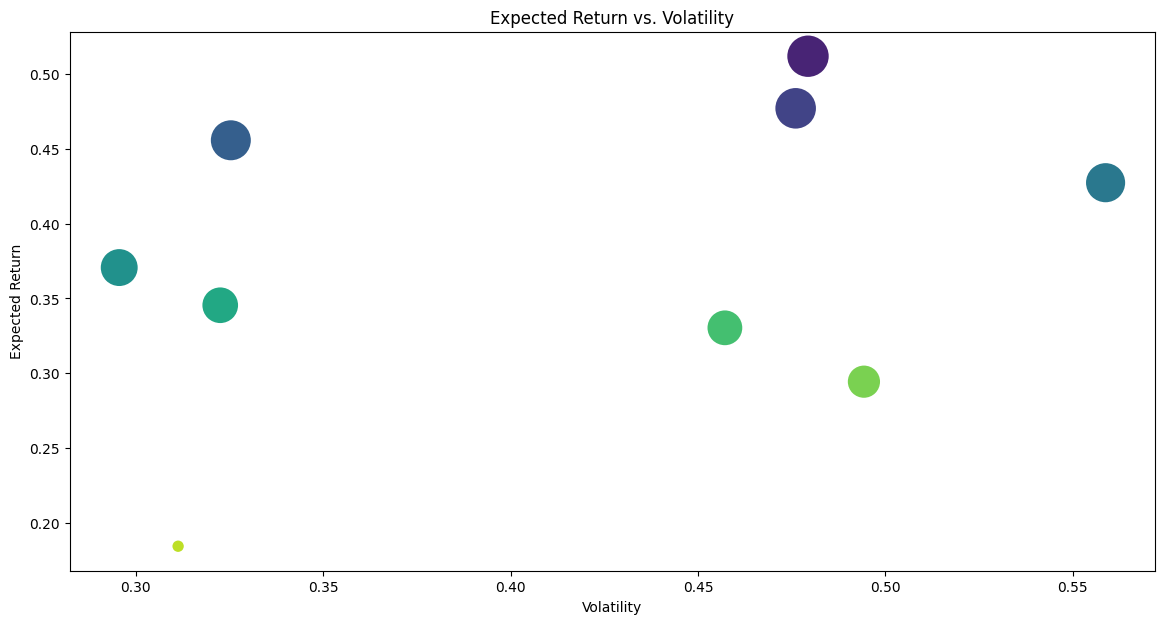

Portfolio Expected Return: 39.22%
Portfolio Volatility: 41.32%
建议买入金额如下：
    Ticker     Buy Amount
44    ANET  448735.264806
171   EPAM  446454.750063
351   ODFL  444883.147204
15    ALGN  442554.370608
125   CPRT  436827.657951
324   MNST  433682.964630
466   VRTX  431570.271403
246   INCY  425652.964832
206   GRMN  393283.262627


In [49]:
# 打印出results_df的前几行以便检查
print("Initial results_df shape:", results_df.shape)
print(results_df.head())

# 筛选出财务健康、预期收益高且估值较低的股票
filtered_df = results_df.dropna(subset=['PE Ratio', 'PEG Ratio', 'ROE', 'Debt to Equity', 'Current Ratio'])

# 打印出过滤后的DataFrame的形状和前几行以便检查
print("Filtered_df shape after dropping NAs:", filtered_df.shape)
print(filtered_df.head())

# 放宽筛选条件
filtered_df = filtered_df[(filtered_df['PE Ratio'] > 0) &
                          (filtered_df['PEG Ratio'] > 0) &
                          (filtered_df['PEG Ratio'] < 5) &
                          (filtered_df['ROE'] > 0.01) &
                          (filtered_df['Debt to Equity'] < 5) &
                          (filtered_df['Current Ratio'] > 0.5)]

# 打印出应用筛选条件后的DataFrame的形状和前几行以便检查
print("Filtered_df shape after applying conditions:", filtered_df.shape)
print(filtered_df.head())

# 选择被低估的股票
undervalued_stocks = filtered_df[(filtered_df['PE Ratio'] < 50)]

# 打印出被低估的股票的形状和前几行以便检查
print("Undervalued_stocks shape:", undervalued_stocks.shape)
print(undervalued_stocks.head())

# 根据预期收益排序并选择前20名
top_stocks = undervalued_stocks.sort_values(by='Expected Return', ascending=False).head(20)

print("2024年可能表现最好的20只被低估的股票：")
print(top_stocks)

# 加权分配资金
initial_investment = 1000000  # 初始资金

# 计算权重
top_stocks['Return Weight'] = top_stocks['Expected Return'] / top_stocks['Expected Return'].sum()
top_stocks['Risk Weight'] = (1 / top_stocks['Volatility']) / (1 / top_stocks['Volatility']).sum()

# 综合考虑回报和风险的权重
top_stocks['Composite Weight'] = (top_stocks['Return Weight'] * 0.7 + top_stocks['Risk Weight'] * 0.3)

# 计算每只股票的分配
top_stocks['Allocation'] = initial_investment * top_stocks['Composite Weight']

print("资金配置如下：")
print(top_stocks[['Ticker', 'Allocation', 'Composite Weight']])

# 凯莉公式计算
def kelly_criterion(win_prob, loss_prob, odds):
    return (win_prob * (odds + 1) - 1) / odds

# 假设每只股票的获胜概率和赔率
top_stocks['Win Probability'] = 0.6  # 假设获胜概率为60%
top_stocks['Loss Probability'] = 1 - top_stocks['Win Probability']
top_stocks['Odds'] = top_stocks['Expected Return'] / 0.05  # 假设基准赔率为5%

top_stocks['Kelly Fraction'] = top_stocks.apply(lambda row: kelly_criterion(row['Win Probability'], row['Loss Probability'], row['Odds']), axis=1)

print("凯莉公式计算结果：")
print(top_stocks[['Ticker', 'Kelly Fraction']])

# 计算投资轮次和现金保留
cash_reserve_fraction = 0.2  # 保留20%的现金
investment_fractions = [0.25, 0.25, 0.25, 0.25]  # 每轮投资比例

# 初始现金保留
cash_reserve = initial_investment * cash_reserve_fraction
available_investment = initial_investment - cash_reserve

# 分配每轮投资的金额
investment_rounds = []
for fraction in investment_fractions:
    round_investment = available_investment * fraction
    investment_rounds.append(round_investment)

# 计算每轮投资的股票分配
for i, round_investment in enumerate(investment_rounds):
    print(f"第{i+1}轮投资金额：{round_investment:.2f}")
    top_stocks[f'Round {i+1} Allocation'] = top_stocks['Kelly Fraction'] * round_investment
    print(top_stocks[['Ticker', f'Round {i+1} Allocation']])

# 合并每轮投资金额
for i in range(len(investment_fractions)):
    if i == 0:
        top_stocks['Total Allocation'] = top_stocks[f'Round {i+1} Allocation']
    else:
        top_stocks['Total Allocation'] += top_stocks[f'Round {i+1} Allocation']

# 可视化结果
if not top_stocks.empty:
    # 柱状图
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Ticker', y='Total Allocation', data=top_stocks, palette='viridis')
    plt.xlabel('Ticker')
    plt.ylabel('Total Allocation ($)')
    plt.title('Total Investment Allocation for Top Stocks Expected to Perform Well After Rate Cut in 2024')
    plt.show()

    # 圆饼图
    plt.figure(figsize=(10, 7))
    plt.pie(top_stocks['Total Allocation'], labels=top_stocks['Ticker'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_stocks)))
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Total Investment Allocation Distribution')
    plt.show()

    # 夏普比率分析
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Ticker', y='Sharpe Ratio', data=top_stocks, palette='coolwarm')
    plt.xlabel('Ticker')
    plt.ylabel('Sharpe Ratio')
    plt.title('Sharpe Ratio of Top Stocks')
    plt.show()

    # 收益和波动率关系
    plt.figure(figsize=(14, 7))
    sns.scatterplot(x='Volatility', y='Expected Return', hue='Ticker', size='Total Allocation', data=top_stocks, sizes=(100, 1000), palette='viridis', legend=False)
    plt.xlabel('Volatility')
    plt.ylabel('Expected Return')
    plt.title('Expected Return vs. Volatility')
    plt.show()

    # 分红收益率分析（如果有分红数据）
    if 'Dividend Yield' in top_stocks.columns:
        plt.figure(figsize=(14, 7))
        sns.barplot(x='Ticker', y='Dividend Yield', data=top_stocks, palette='magma')
        plt.xlabel('Ticker')
        plt.ylabel('Dividend Yield (%)')
        plt.title('Dividend Yield of Top Stocks')
        plt.show()

    # 组合回报率和波动率
    portfolio_return = (top_stocks['Expected Return'] * top_stocks['Composite Weight']).sum()
    portfolio_volatility = (top_stocks['Volatility'] * top_stocks['Composite Weight']).sum()
    print(f"Portfolio Expected Return: {portfolio_return:.2%}")
    print(f"Portfolio Volatility: {portfolio_volatility:.2%}")

else:
    print("No stocks found for visualization.")

# 投资策略行动项
action_items = top_stocks[['Ticker', 'Kelly Fraction', 'Total Allocation']].copy()
action_items['Buy Amount'] = action_items['Total Allocation']
print("建议买入金额如下：")
print(action_items[['Ticker', 'Buy Amount']])
